In [29]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import f_oneway, chi2_contingency
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler



In [30]:
df = pd.read_csv('data.csv')

df.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [31]:
print("Missing Values:\n", df.isnull().sum())

df.dropna(inplace=True)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)



Missing Values:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64
Number of duplicate rows: 0


In [32]:
df['Bankrupt?'] = df['Bankrupt?'].astype('category')
df[' Liability-Assets Flag'] = df[' Liability-Assets Flag'].astype('category')
df[' Net Income Flag'] = df[' Net Income Flag'].astype('category')

numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.drop(columns=['Bankrupt?']).select_dtypes(include=['category']).columns

print("Numerical Features:\n", numerical_features)
print("Categorical Features:\n", categorical_features)


Numerical Features:
 Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operatin

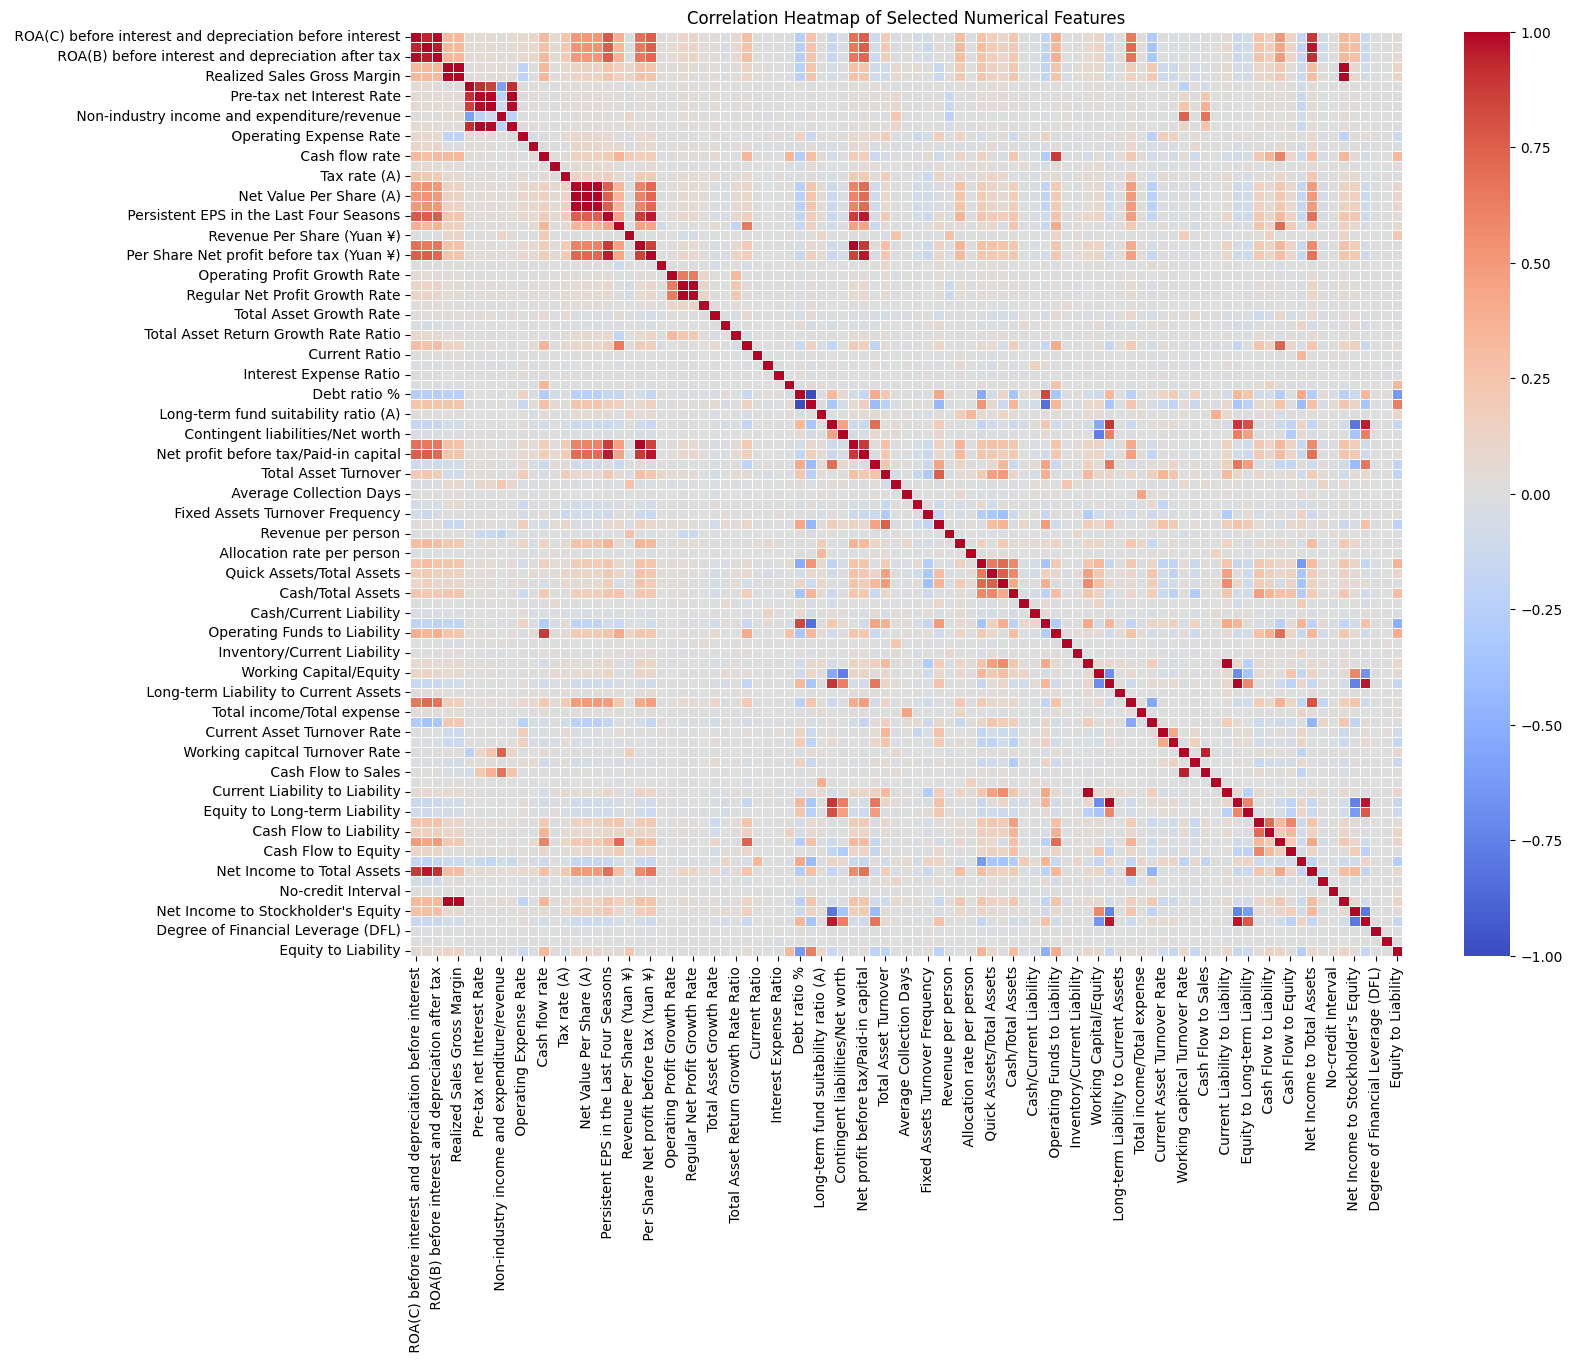

In [33]:
plt.figure(figsize=(16, 12))
correlation_matrix_numerical = df[numerical_features].corr()
sns.heatmap(correlation_matrix_numerical, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()


Reduced Numerical Features:
 [' ROA(C) before interest and depreciation before interest', ' Operating Gross Margin', ' Operating Profit Rate', ' Non-industry income and expenditure/revenue', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Average Collectio

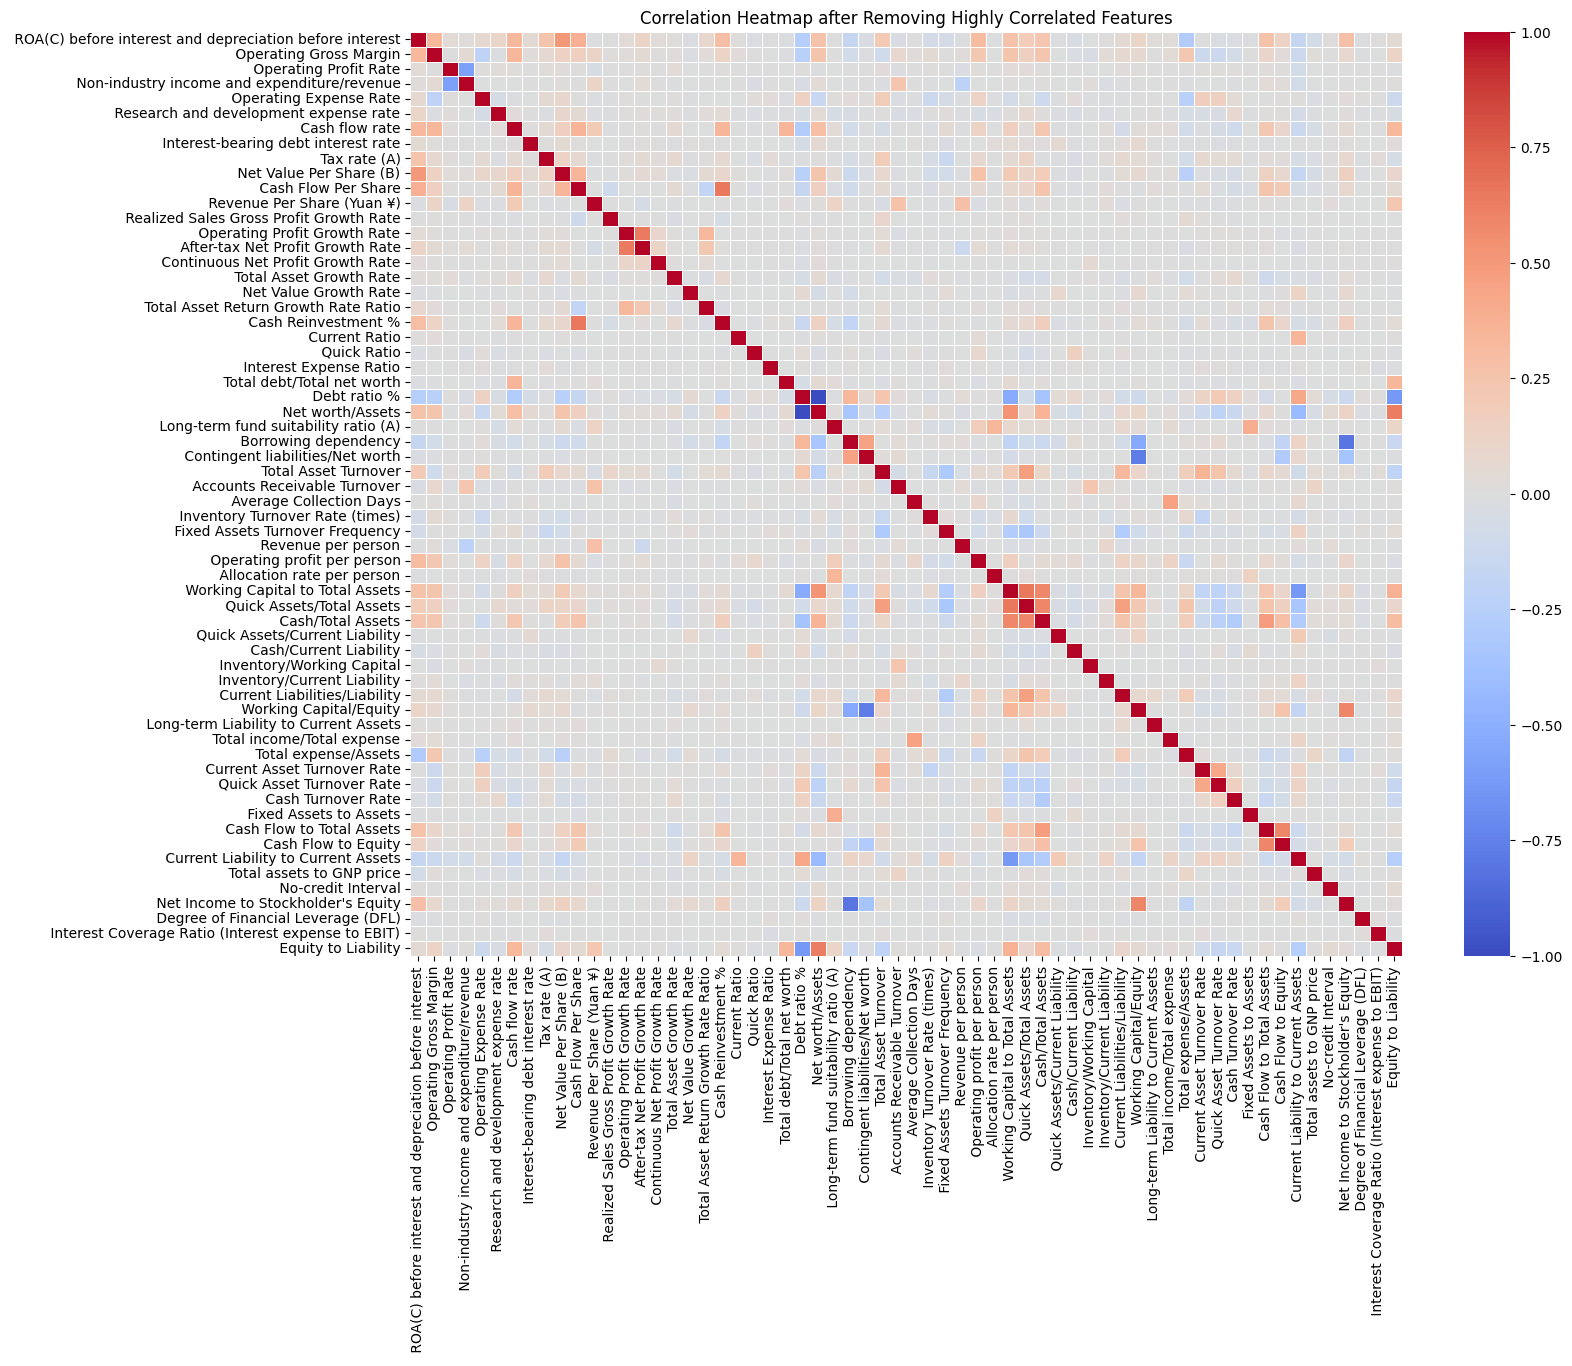

In [34]:
# drop features w/ high correlation
threshold = 0.70
high_correlation_drop = []

for i in range(len(correlation_matrix_numerical.columns)):
    for j in range(i):
        if correlation_matrix_numerical.iloc[i, j] > threshold:
            feature_name = correlation_matrix_numerical.columns[i]
            if feature_name not in high_correlation_drop:
                high_correlation_drop.append(feature_name)

# Remaining features 
numerical_features_reduced = [feature for feature in numerical_features if feature not in high_correlation_drop]
print("Reduced Numerical Features:\n", numerical_features_reduced)


plt.figure(figsize=(16, 12))
correlation_matrix_reduced = df[numerical_features_reduced].corr()
sns.heatmap(correlation_matrix_reduced, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap after Removing Highly Correlated Features')
plt.show()


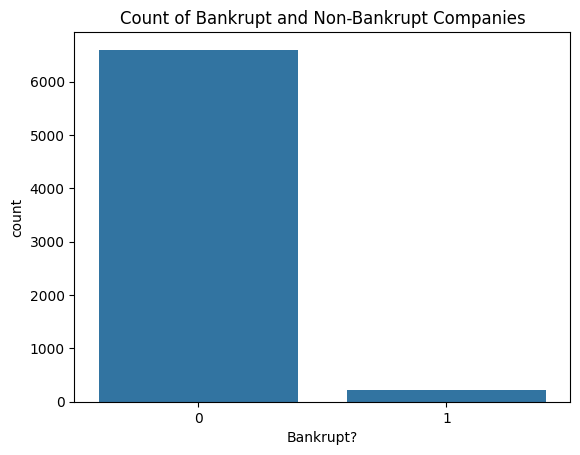

In [35]:
sns.countplot(x='Bankrupt?', data=df)
plt.title('Count of Bankrupt and Non-Bankrupt Companies')
plt.show()


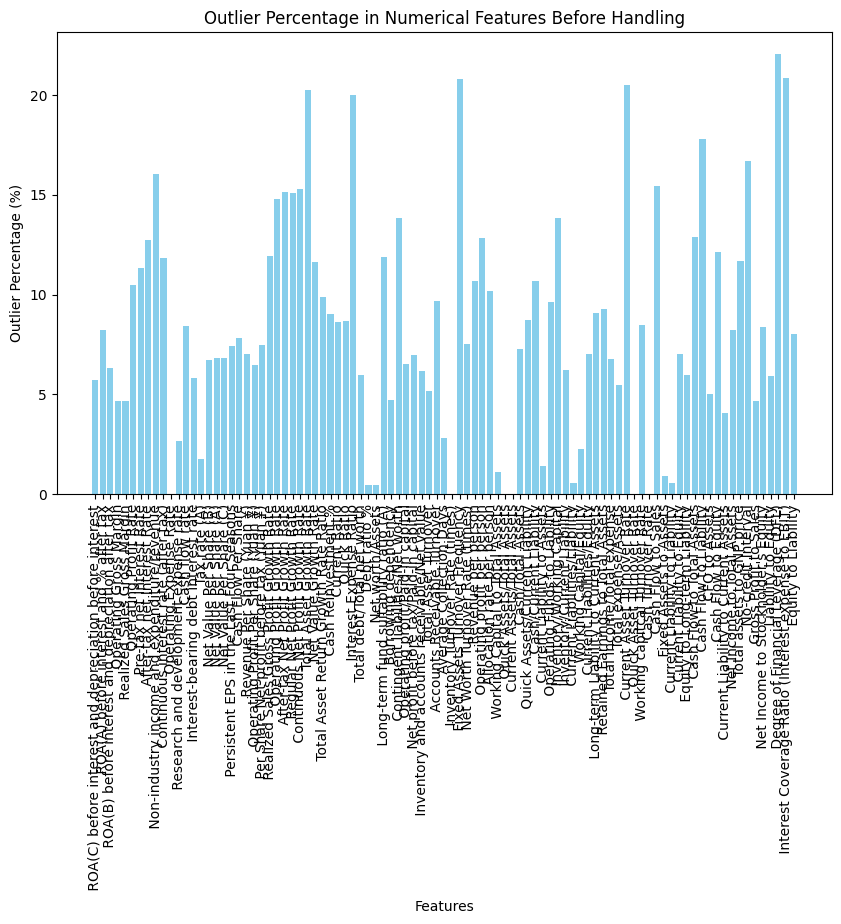

In [36]:
# percentage of outliers
def plot_outlier_histogram(dataframe):
    outlier_percentage = {}

    for feature in dataframe.select_dtypes(include=[np.number]).columns:
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)]
        outlier_percentage[feature] = (len(outliers) / len(dataframe)) * 100

    plt.figure(figsize=(10, 6))
    plt.bar(outlier_percentage.keys(), outlier_percentage.values(), color='skyblue')
    plt.xlabel('Features')
    plt.ylabel('Outlier Percentage (%)')
    plt.title('Outlier Percentage in Numerical Features Before Handling')
    plt.xticks(rotation=90)
    plt.show()

plot_outlier_histogram(df)


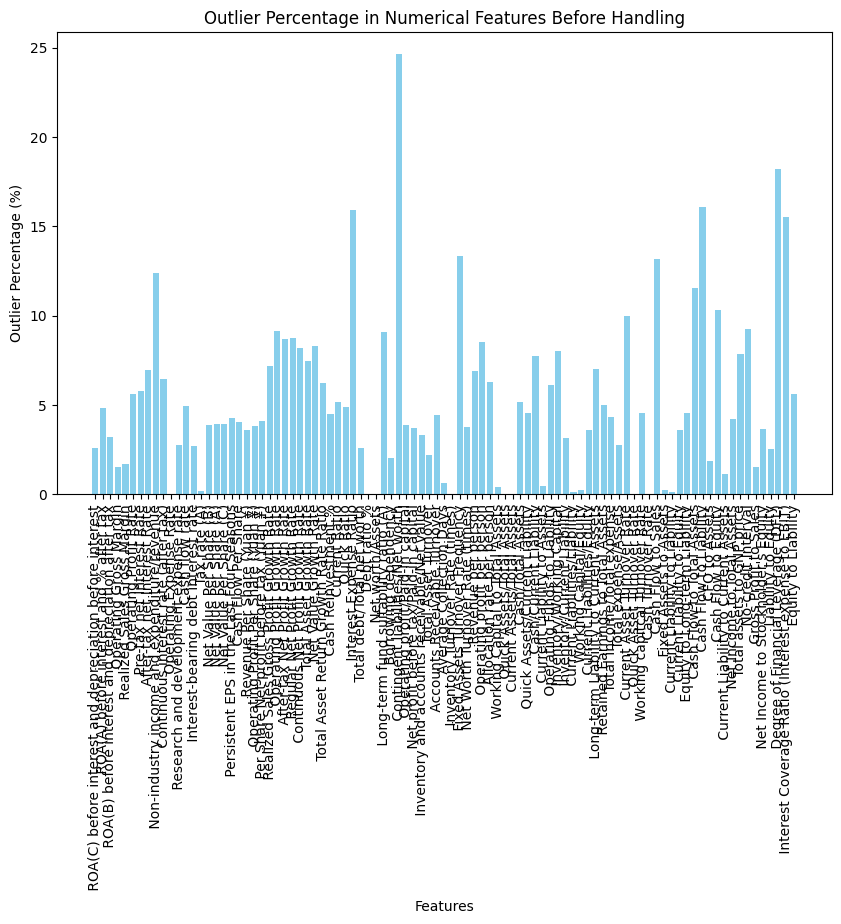

In [37]:
def replace_outliers_iqr(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    return df

# Handling outliers
df = replace_outliers_iqr(df)

plot_outlier_histogram(df)


C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


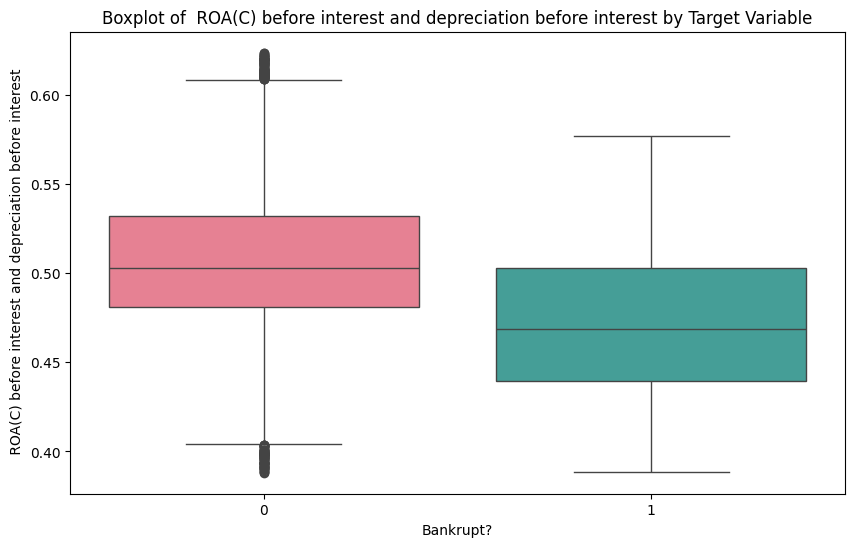

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


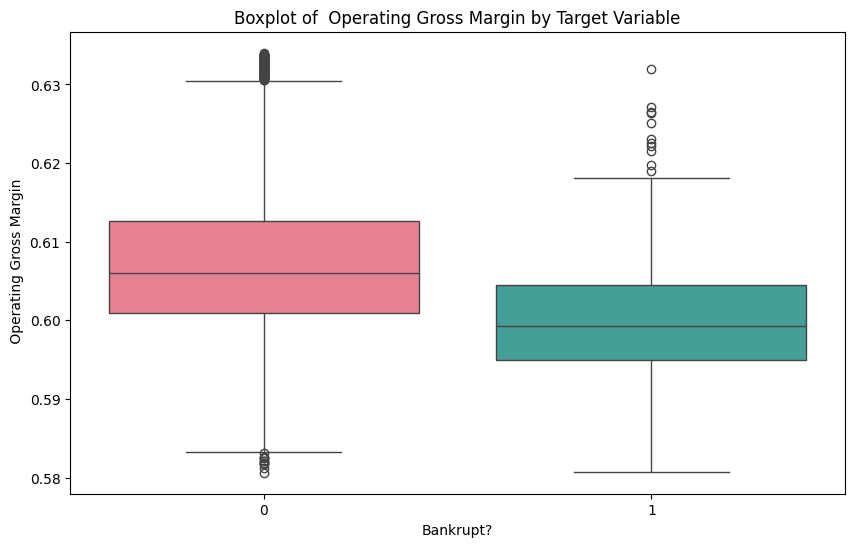

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


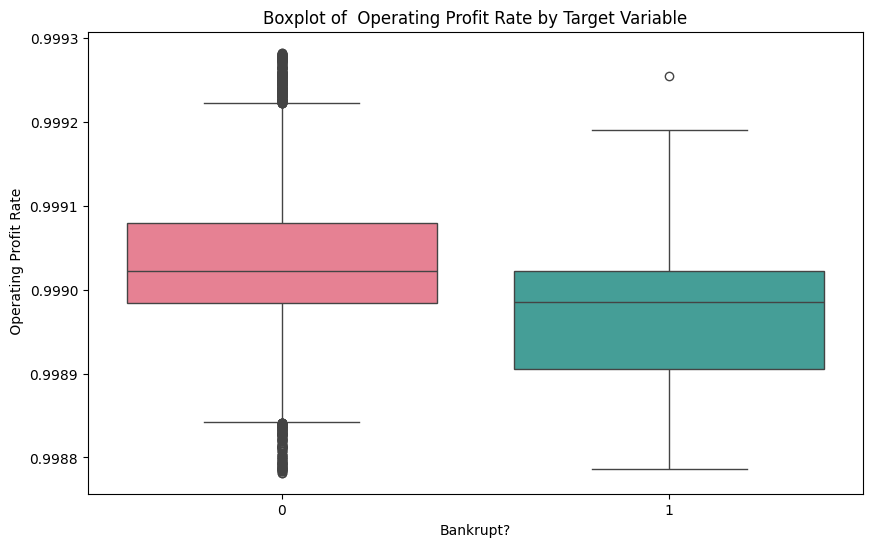

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


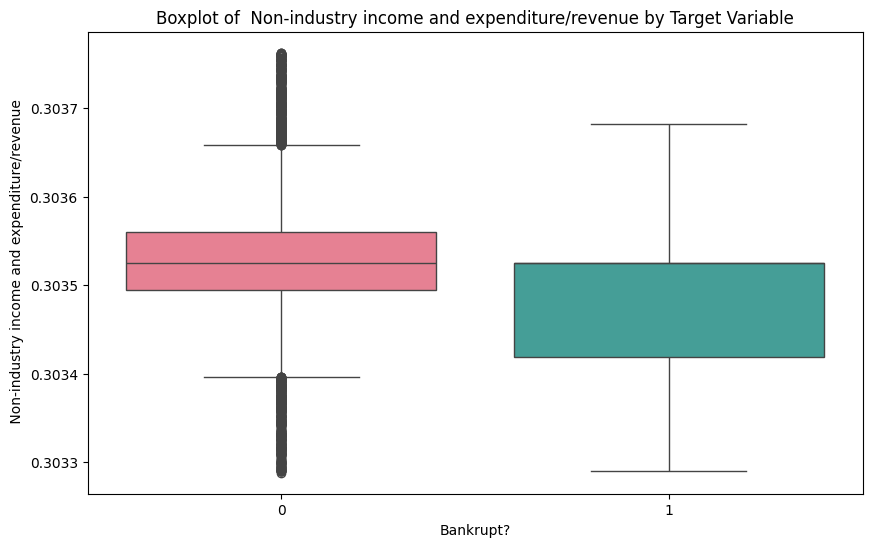

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


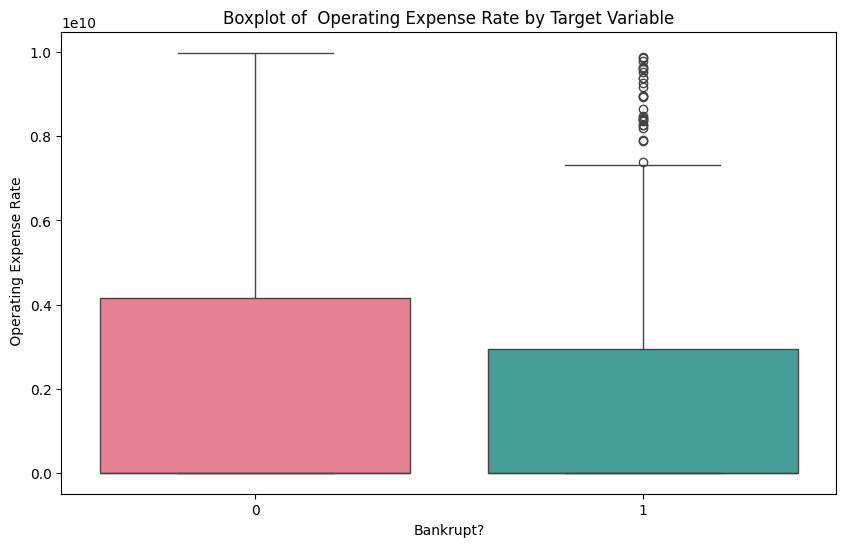

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


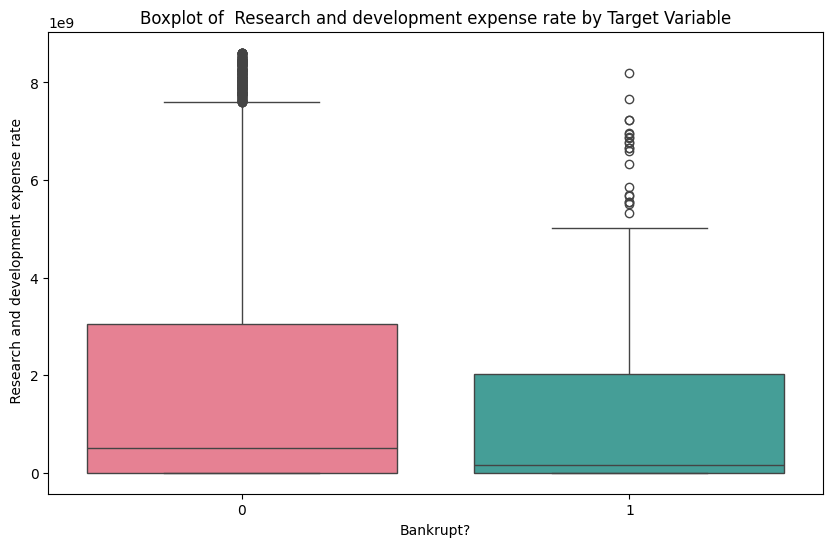

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


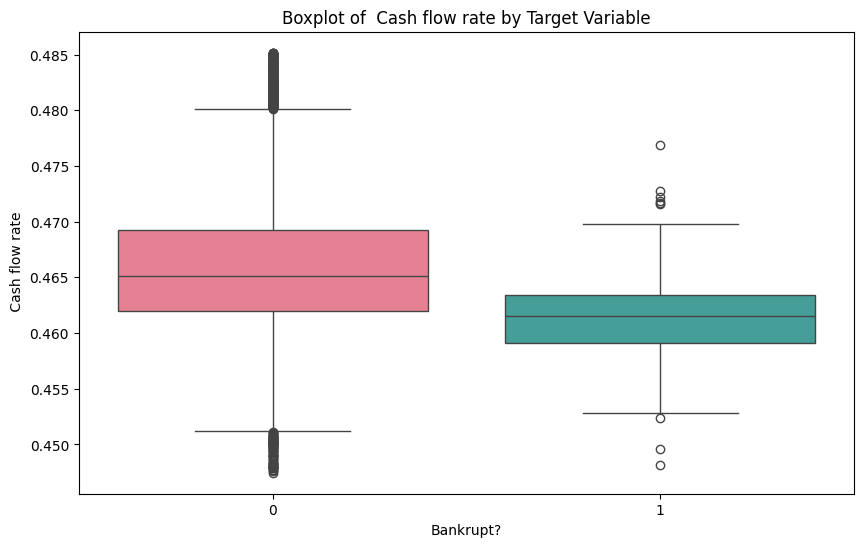

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


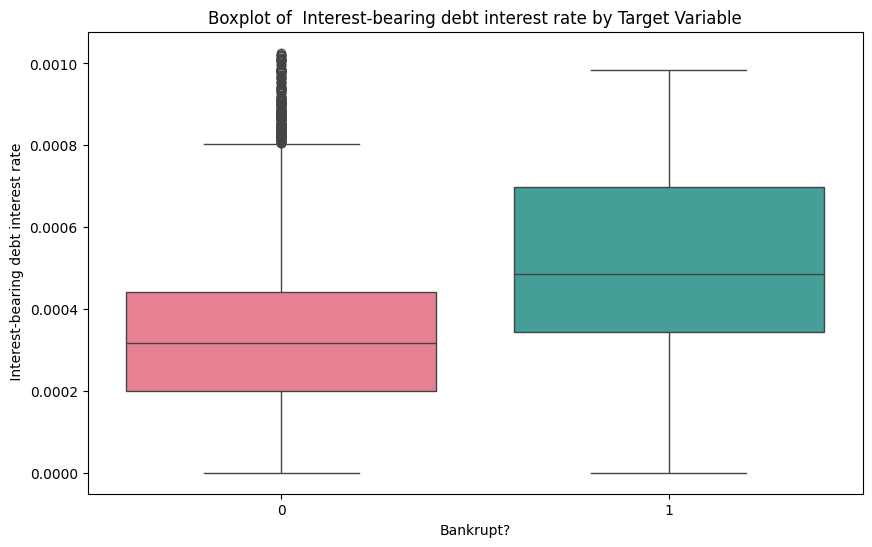

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


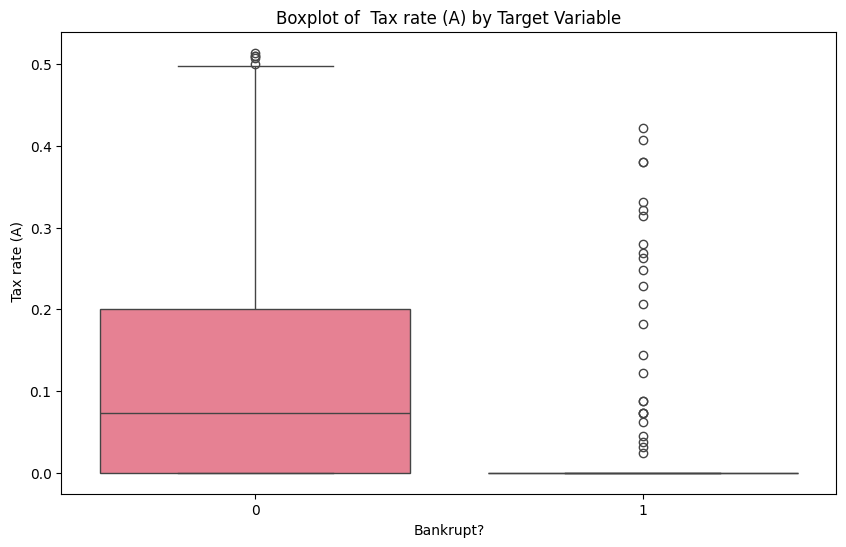

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


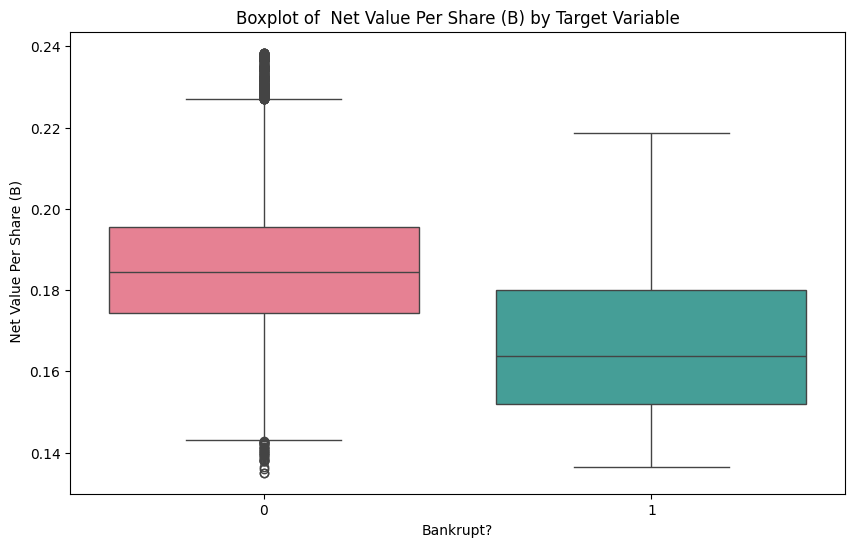

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


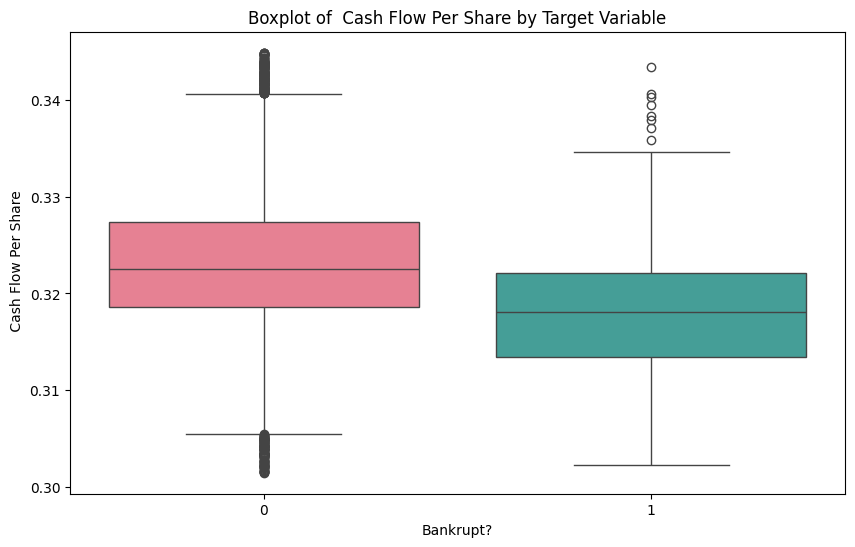

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


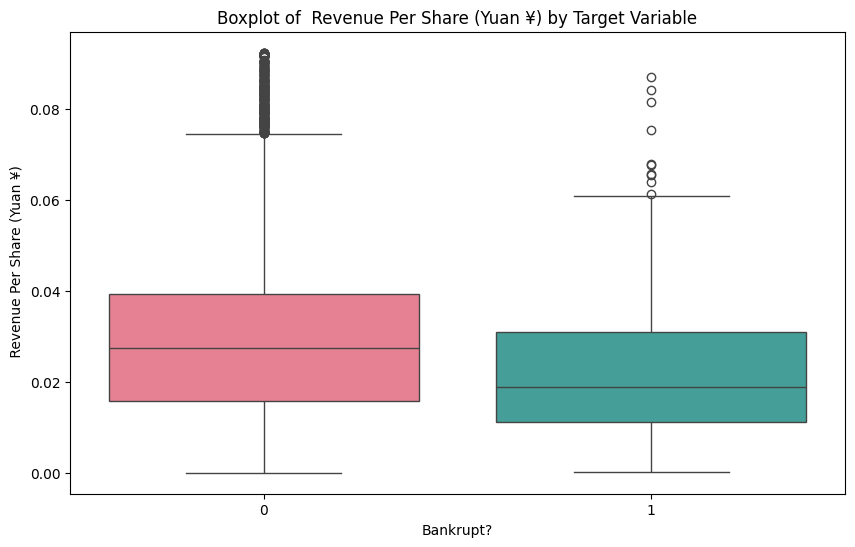

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


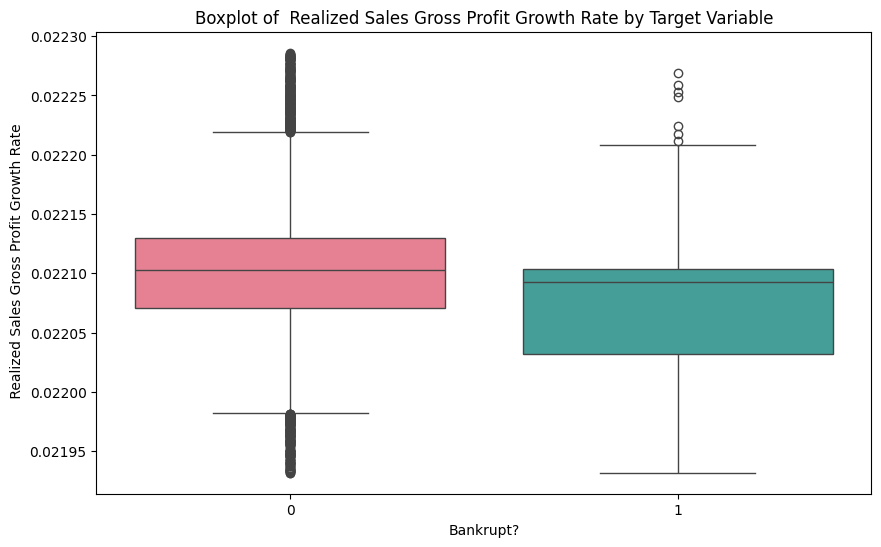

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


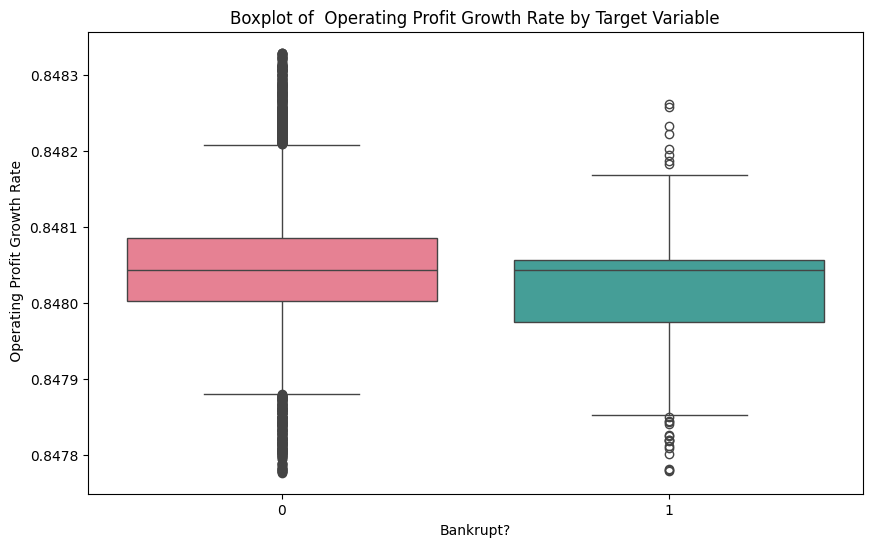

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


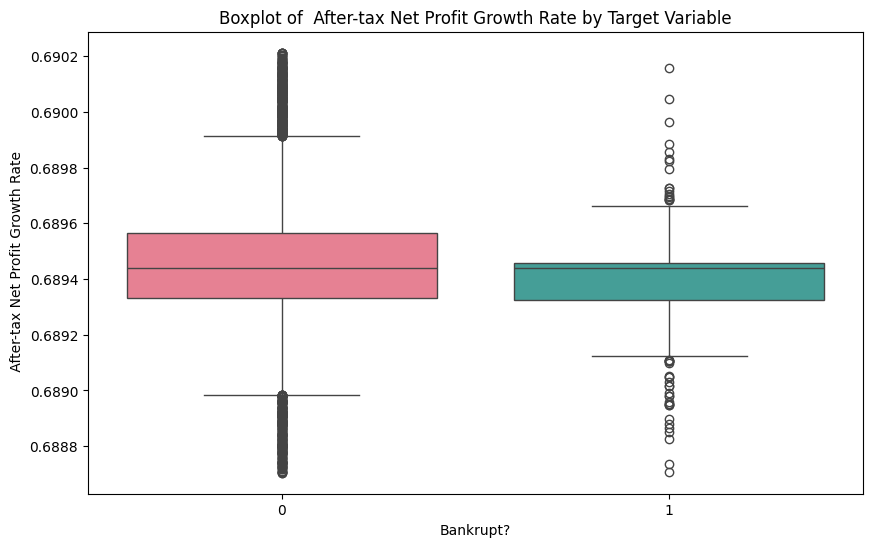

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


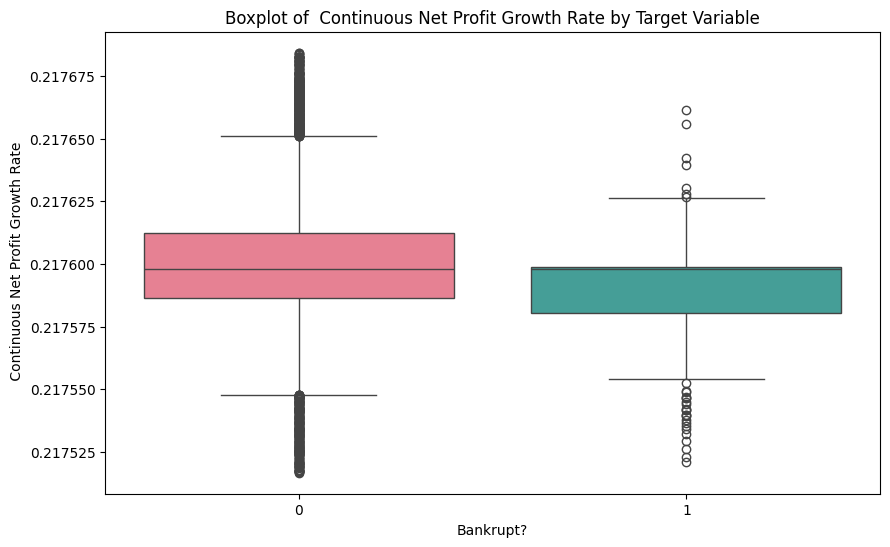

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


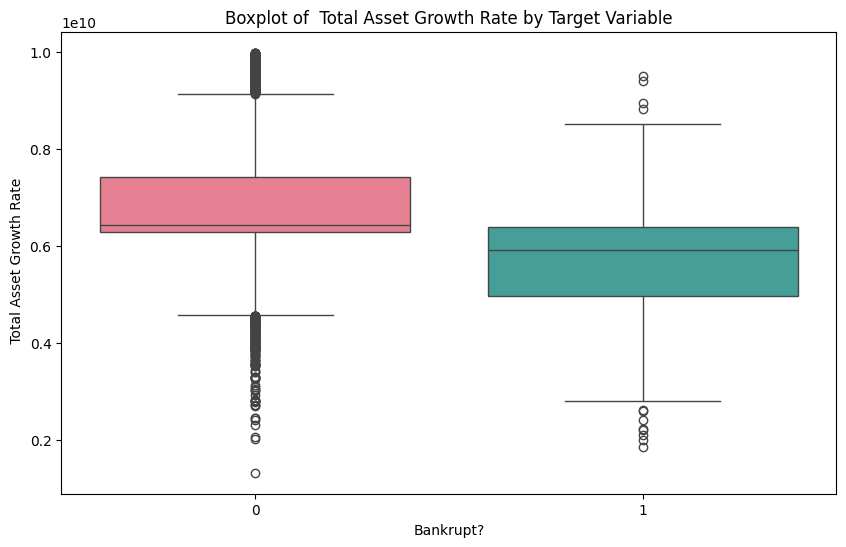

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


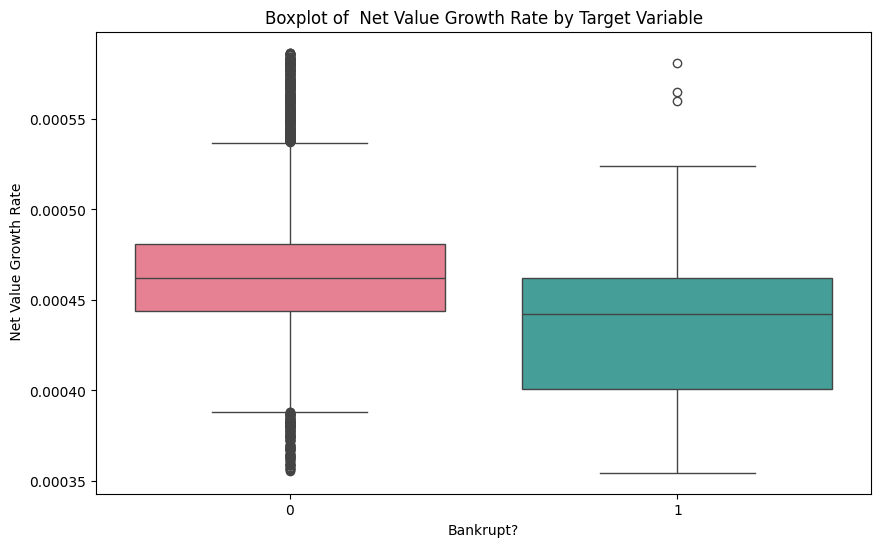

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


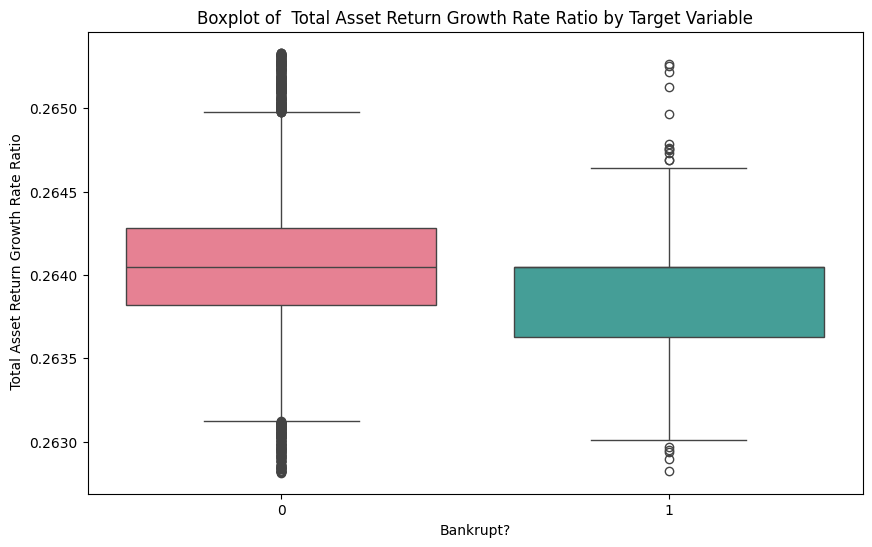

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


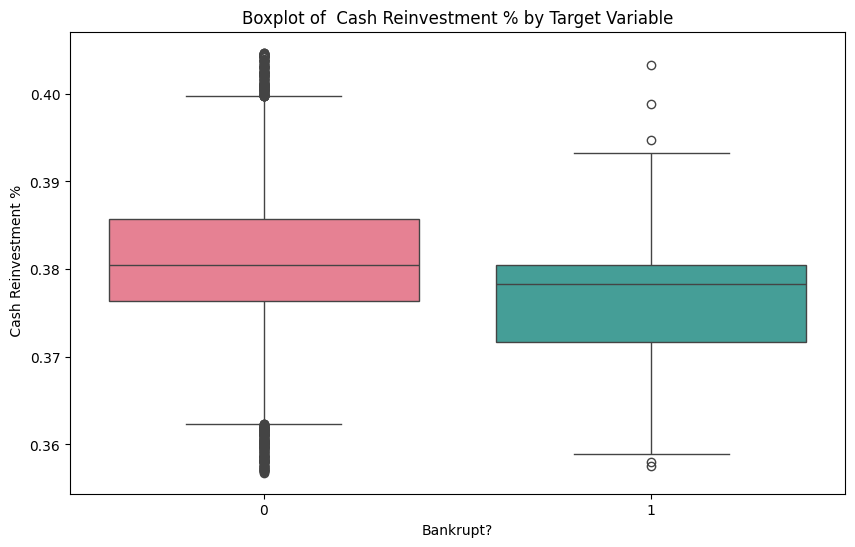

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


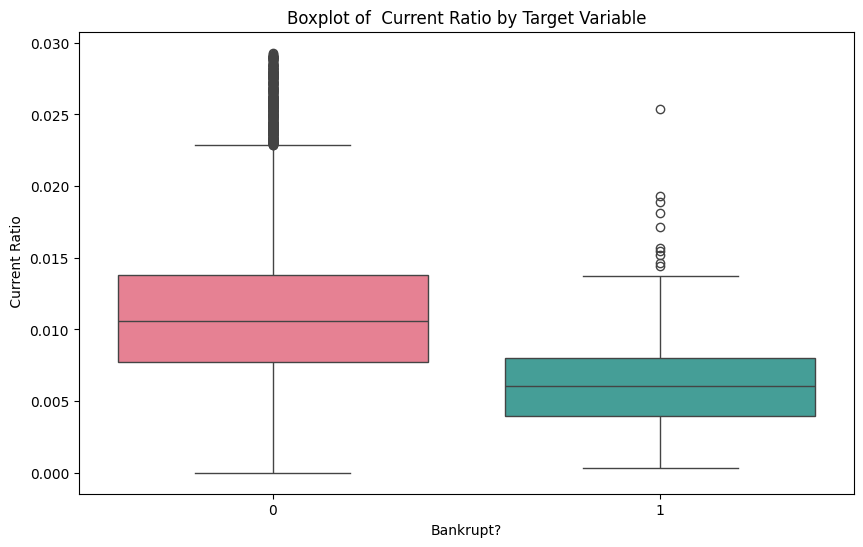

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


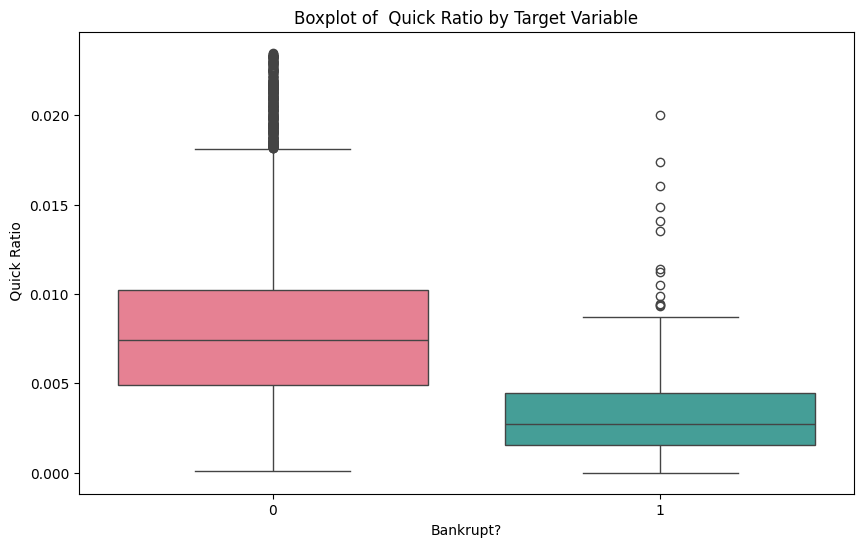

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


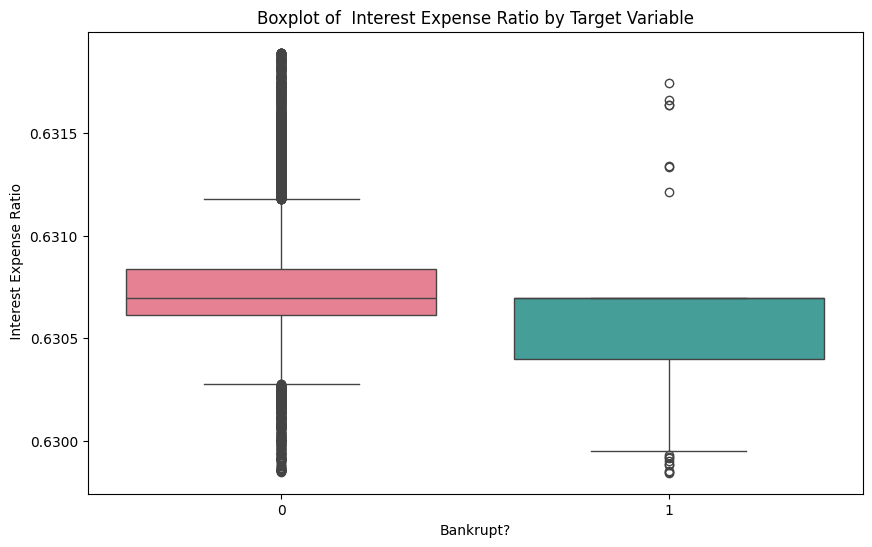

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


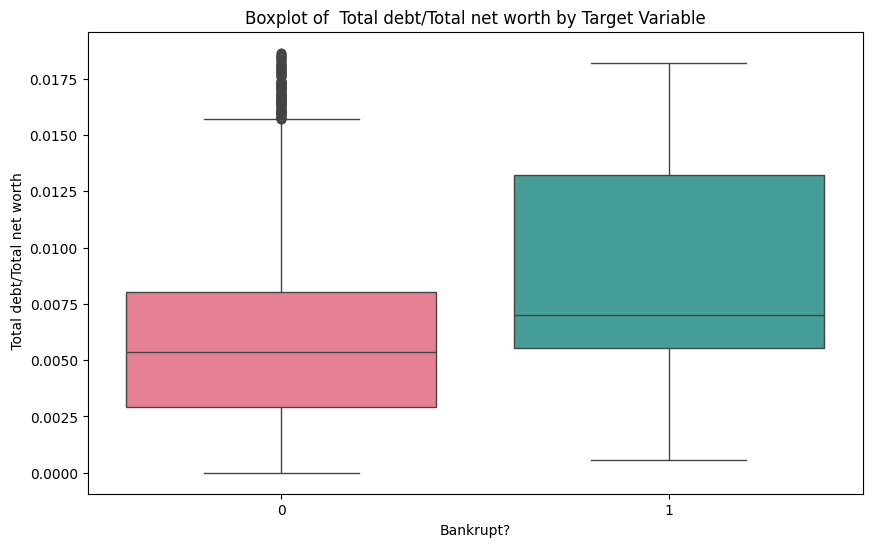

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


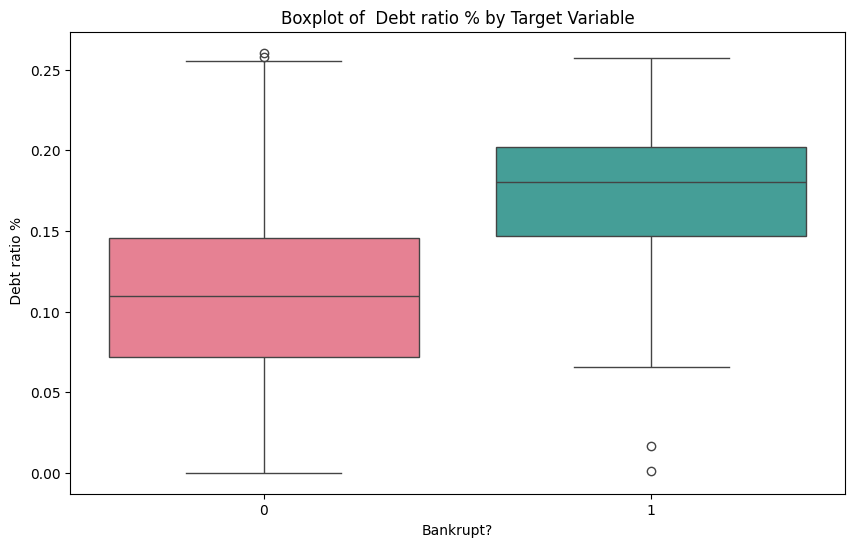

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


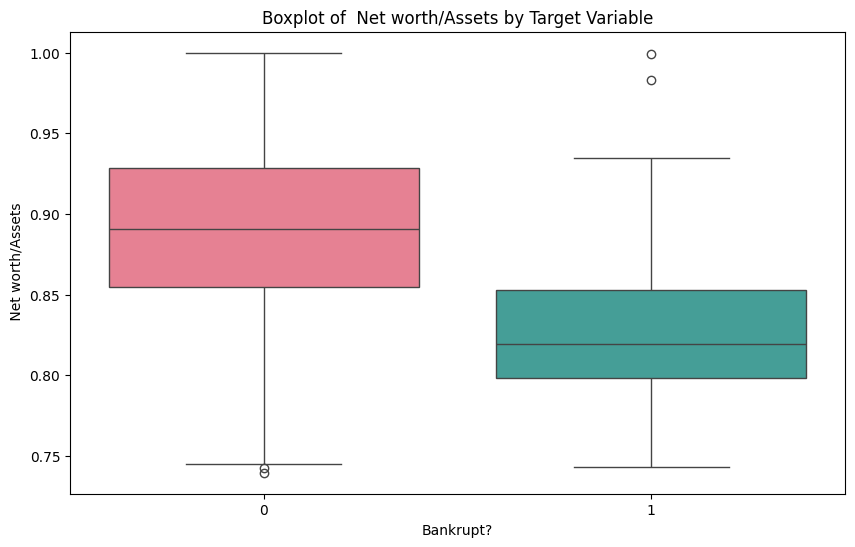

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


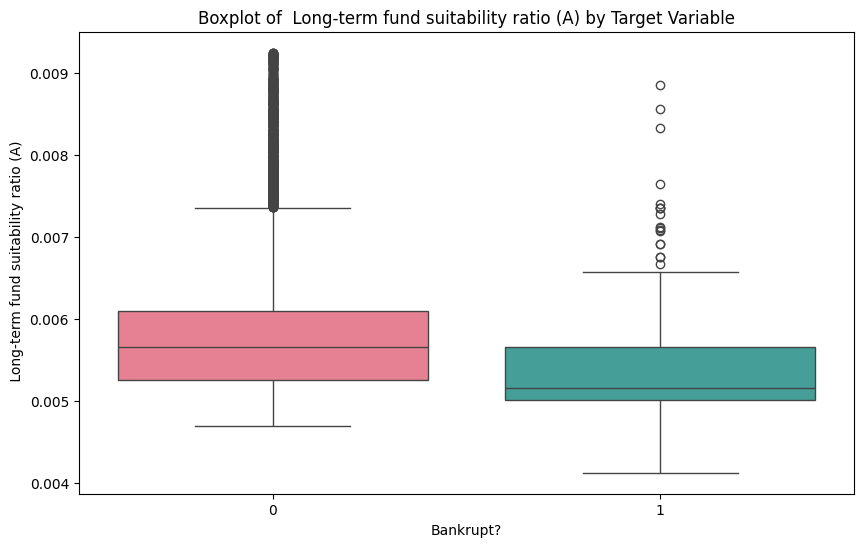

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


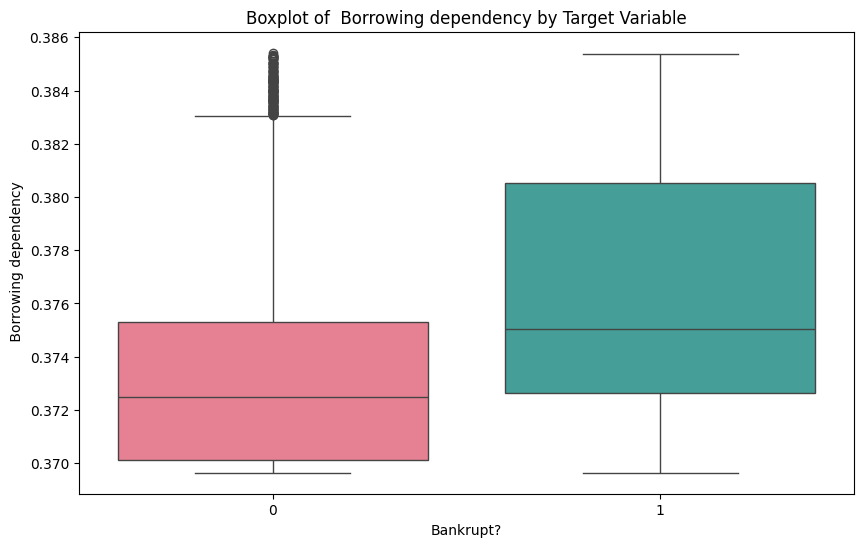

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


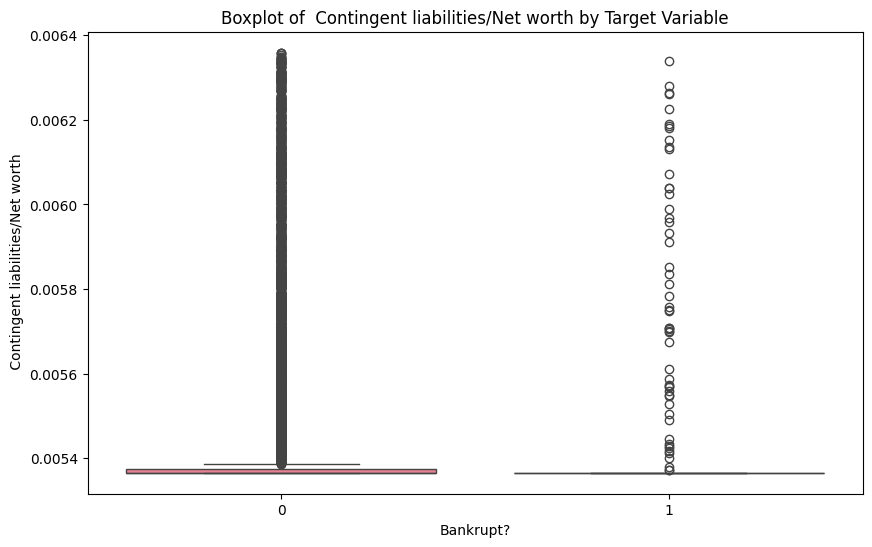

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


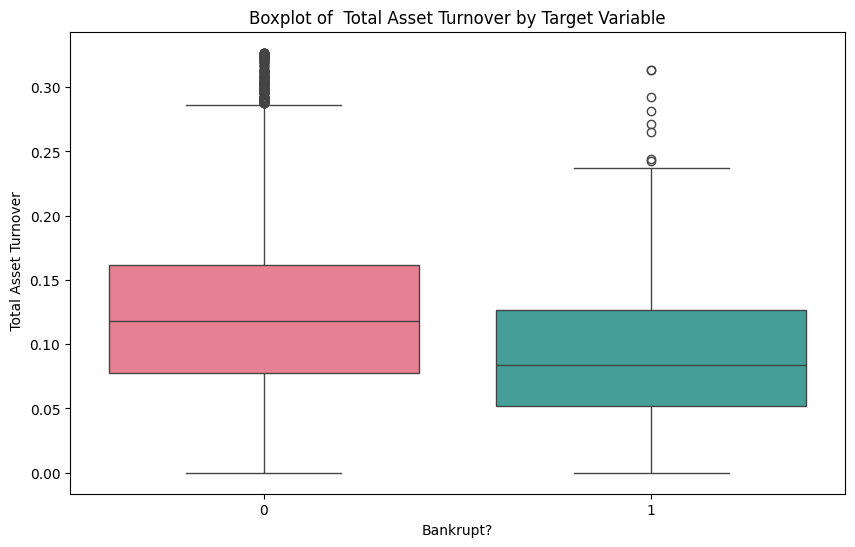

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


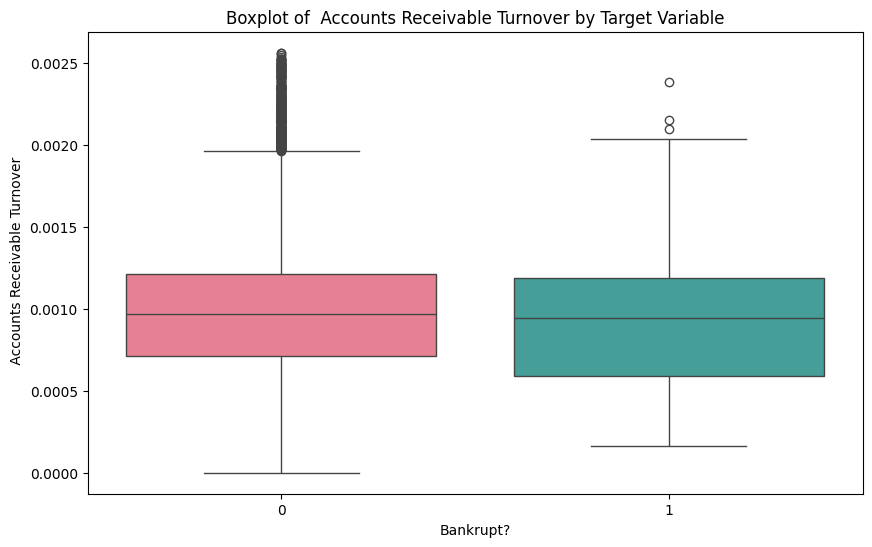

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


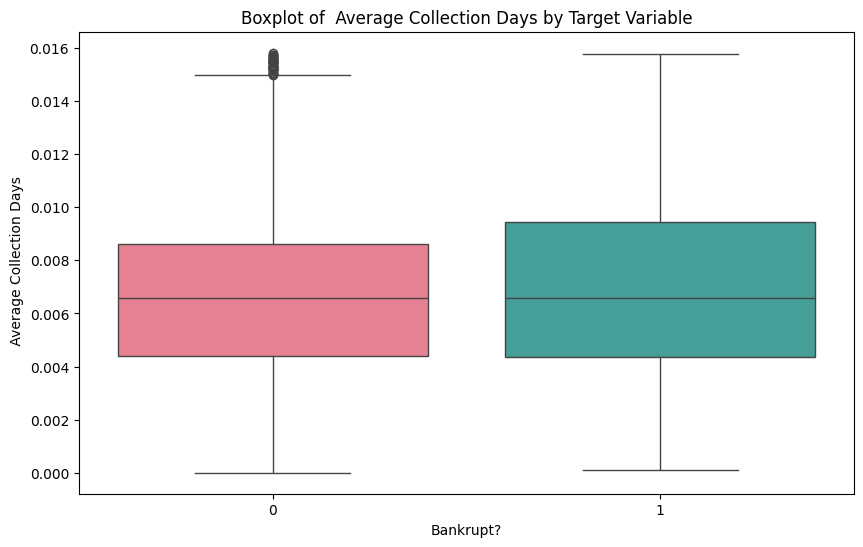

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


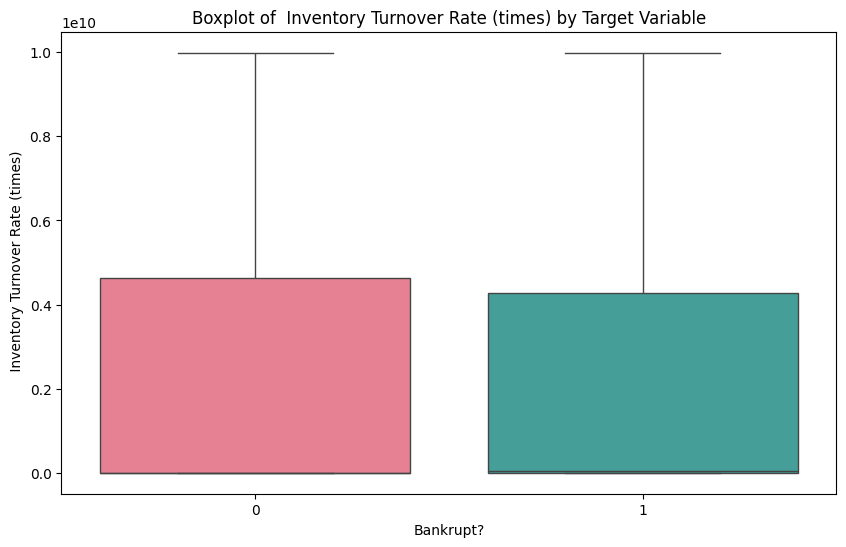

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


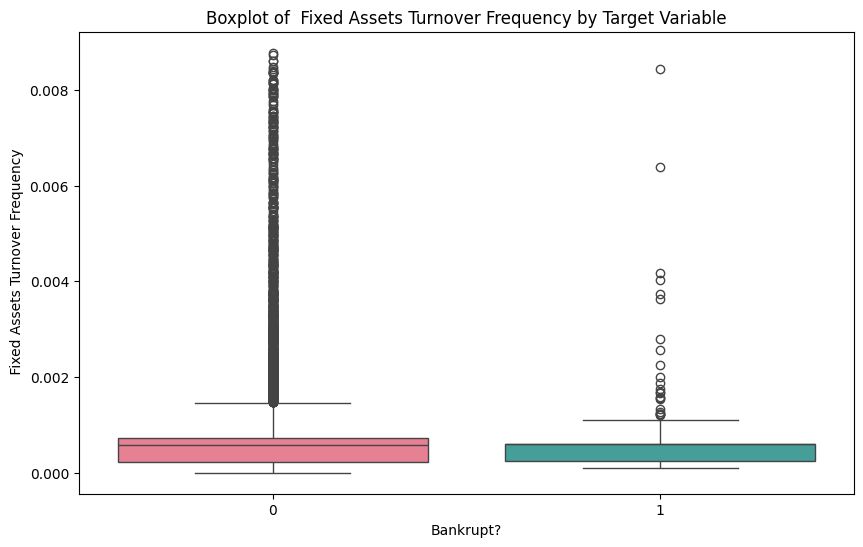

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


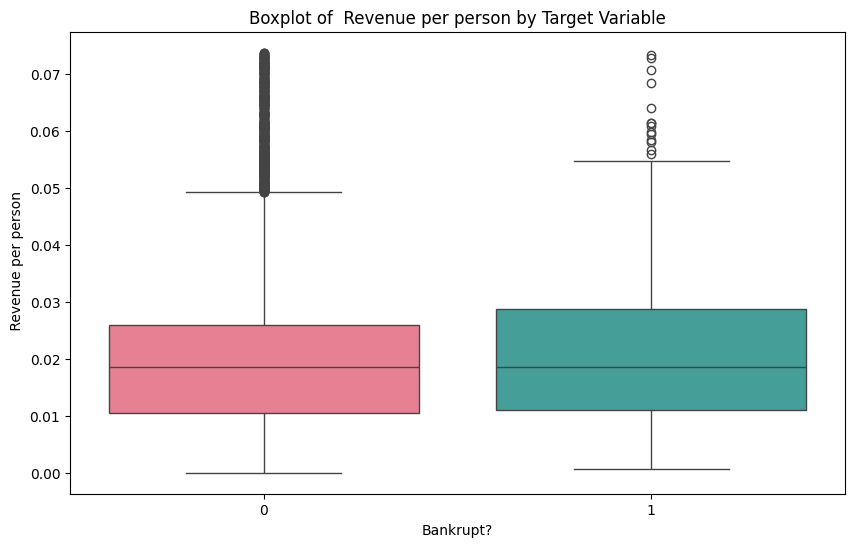

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


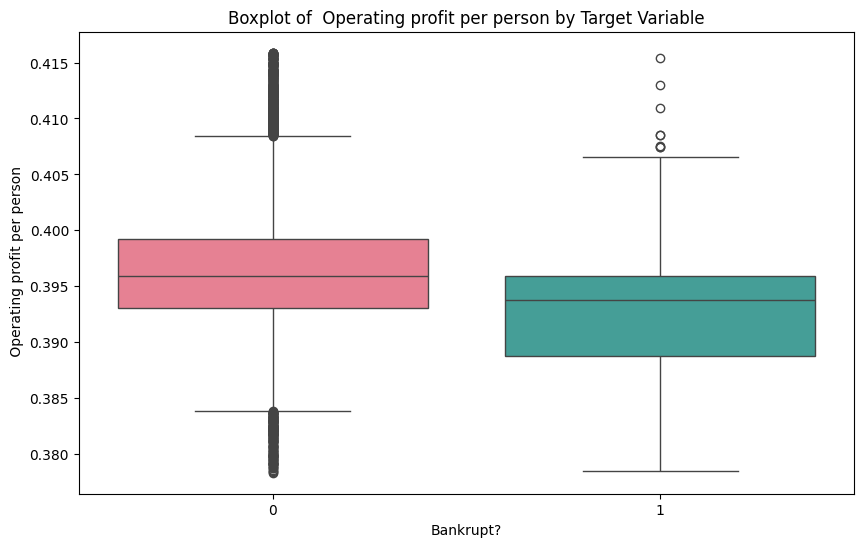

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


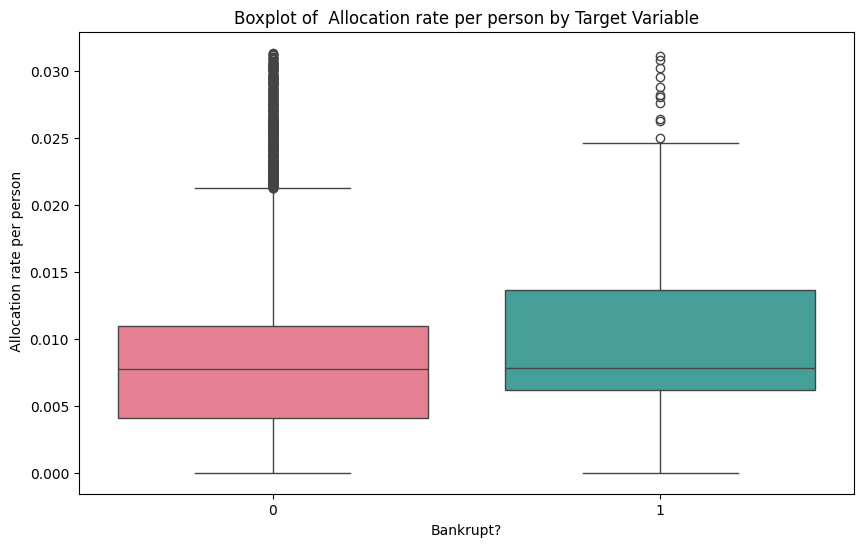

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


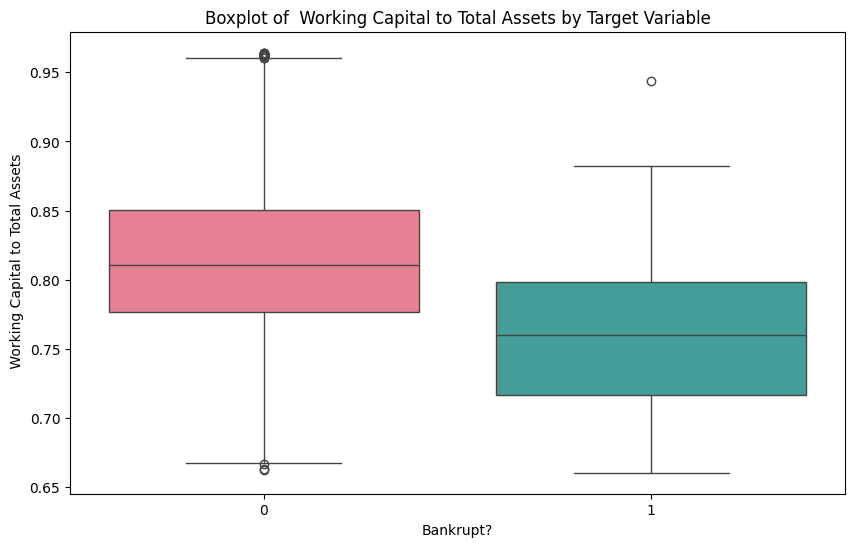

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


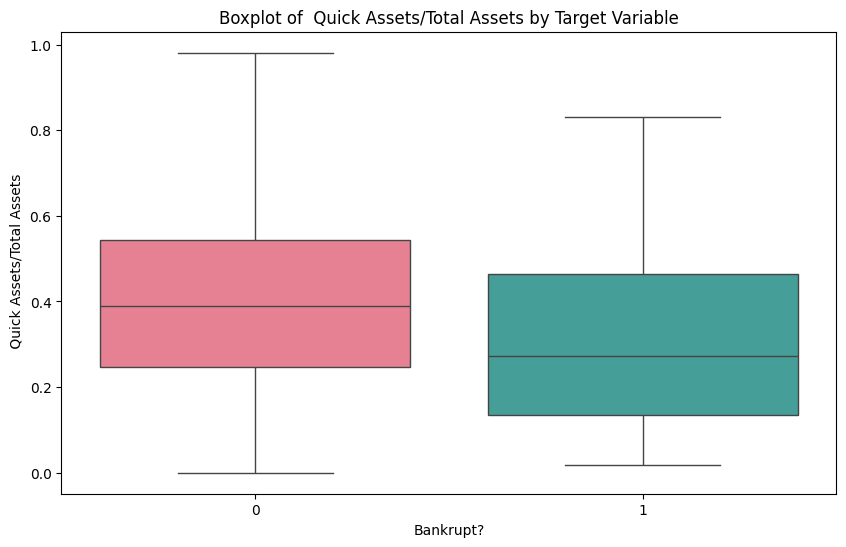

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


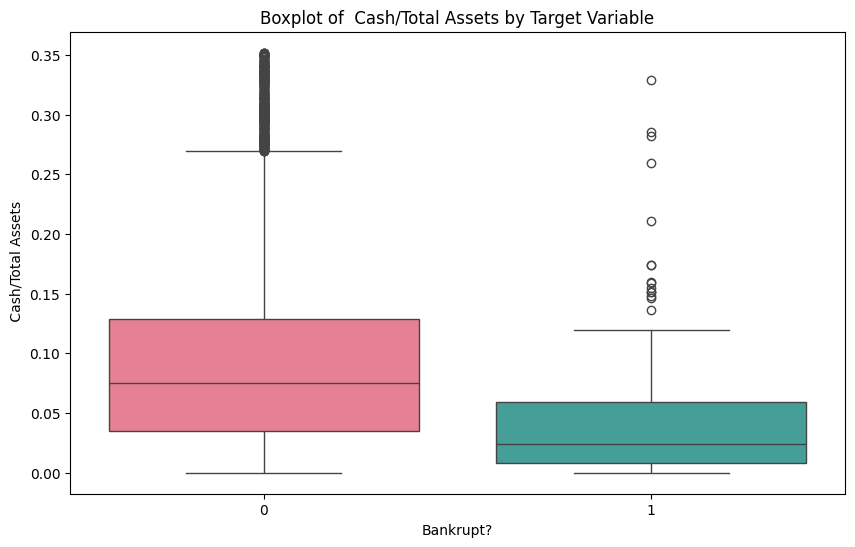

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


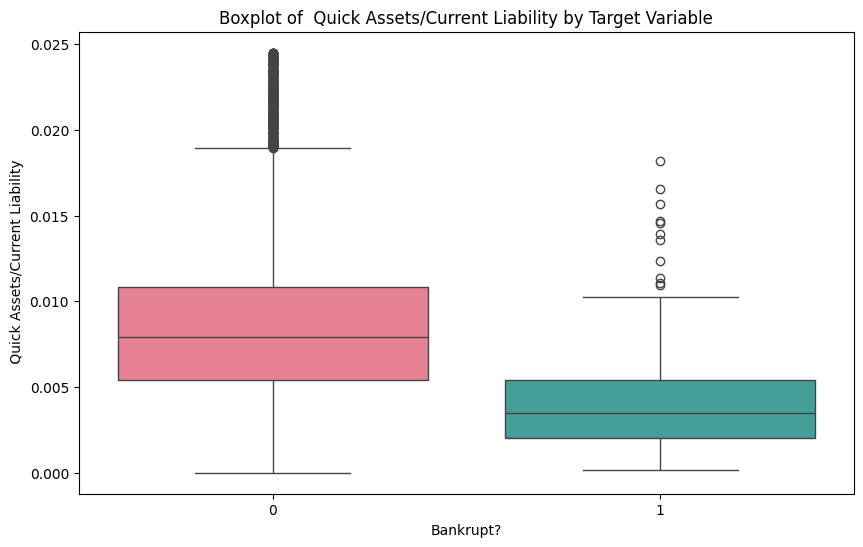

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


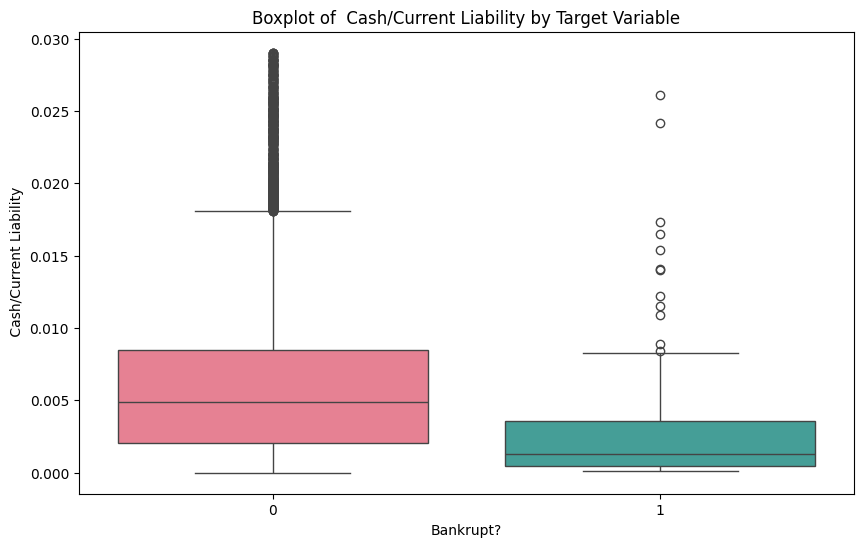

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


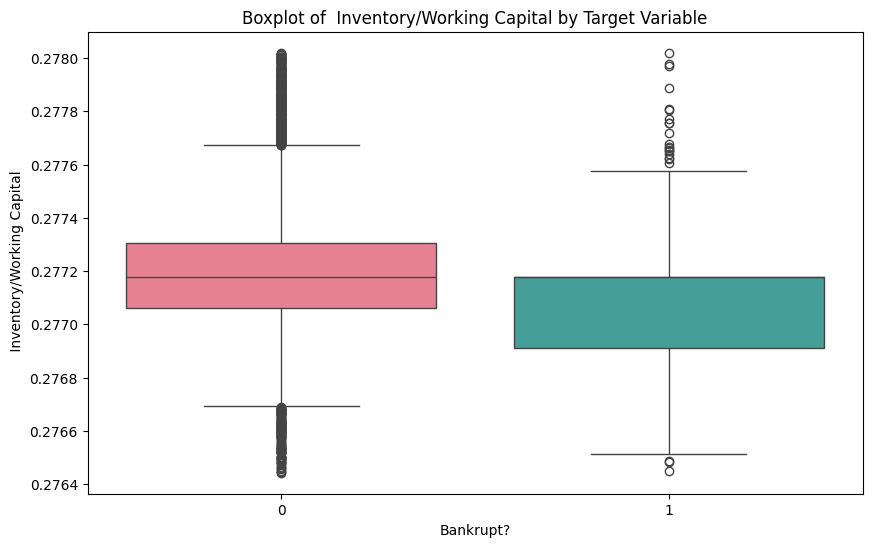

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


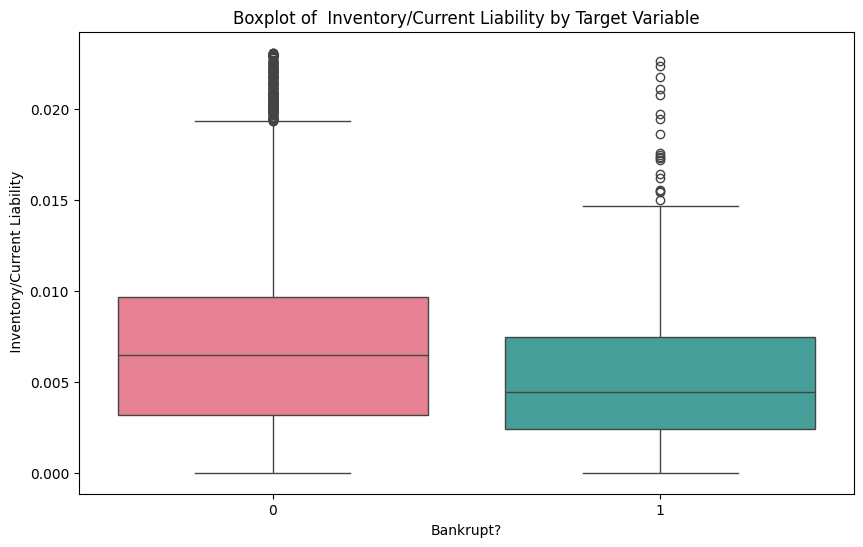

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


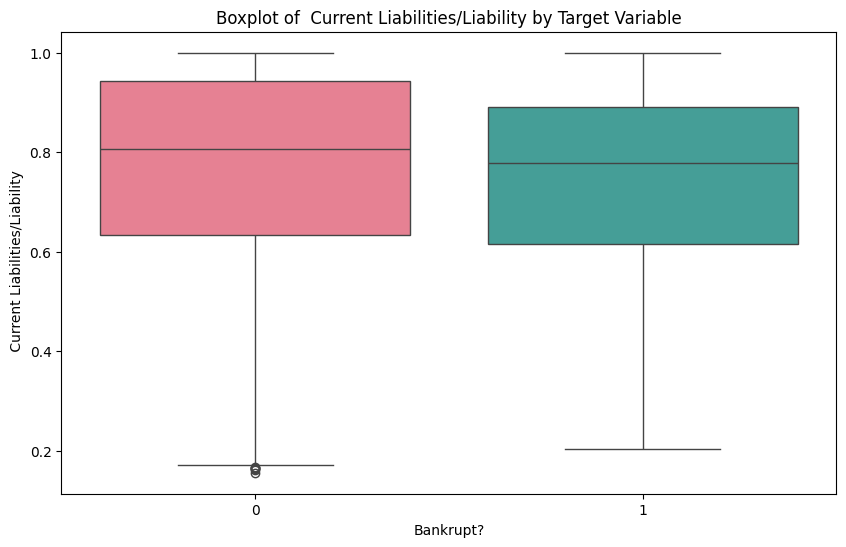

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


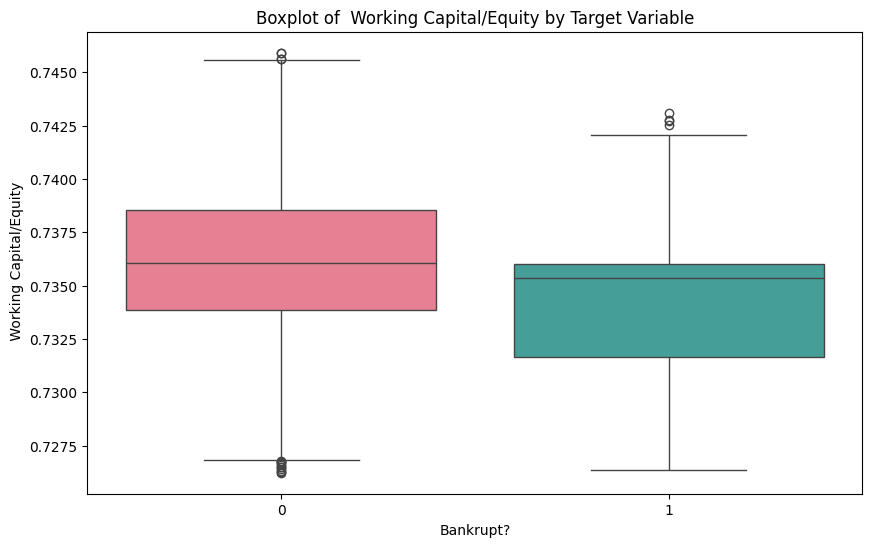

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


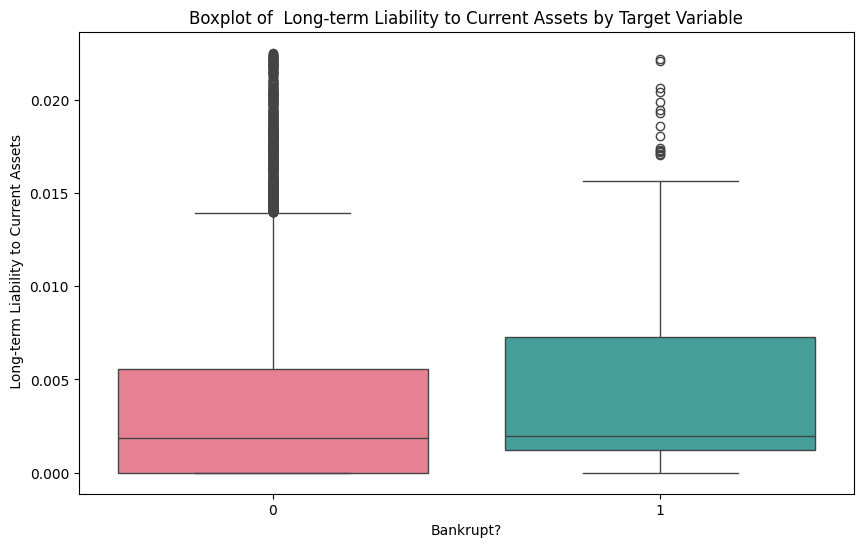

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


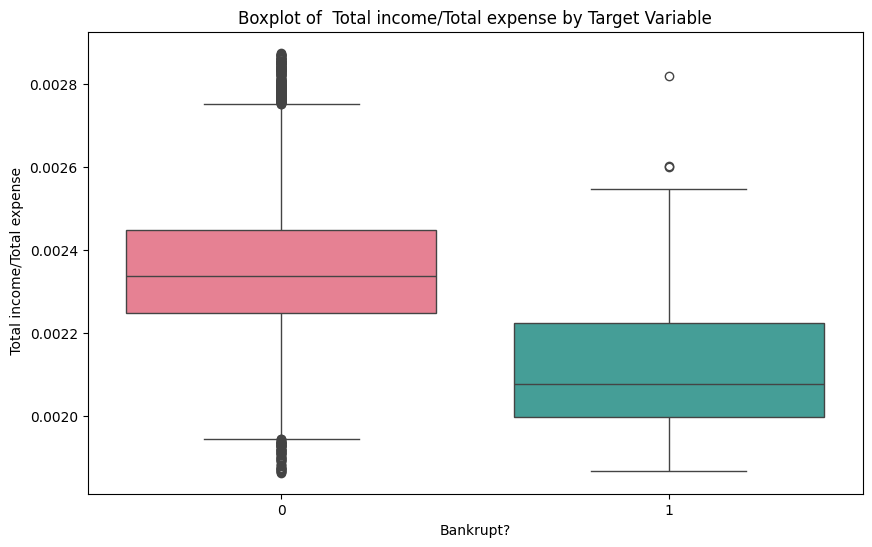

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


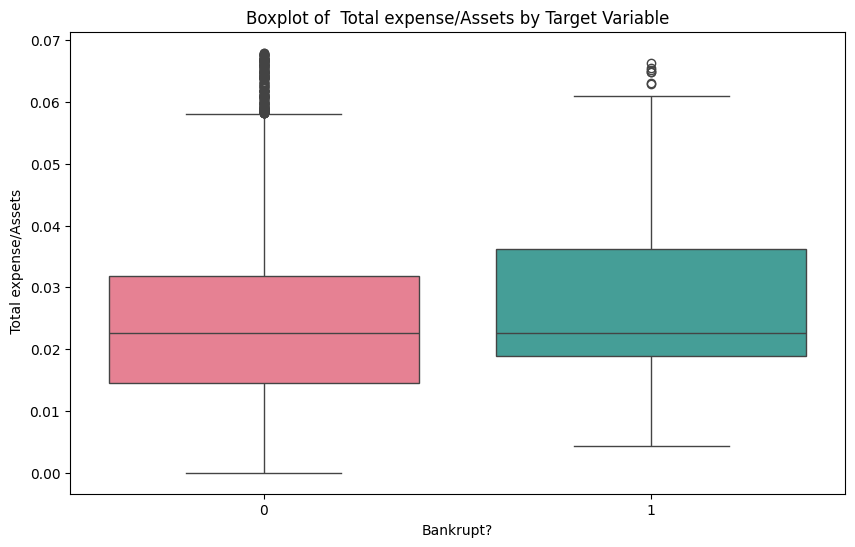

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


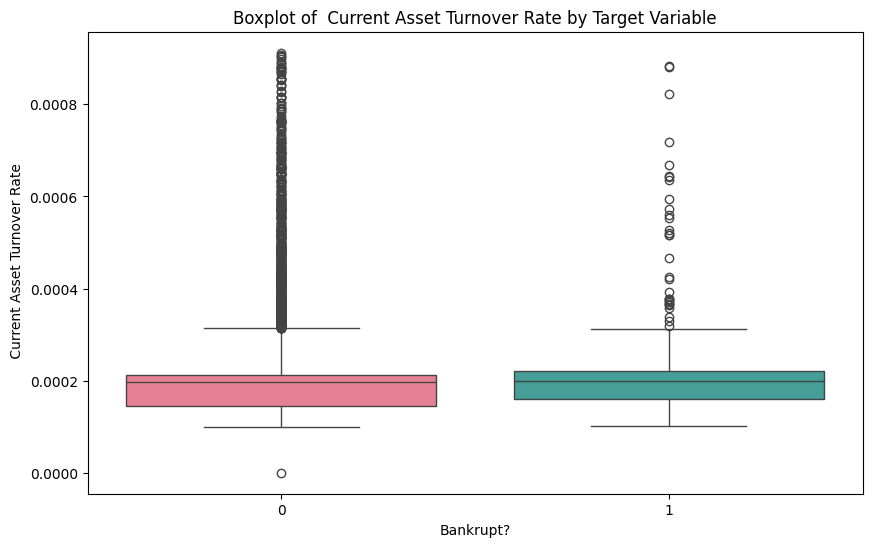

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


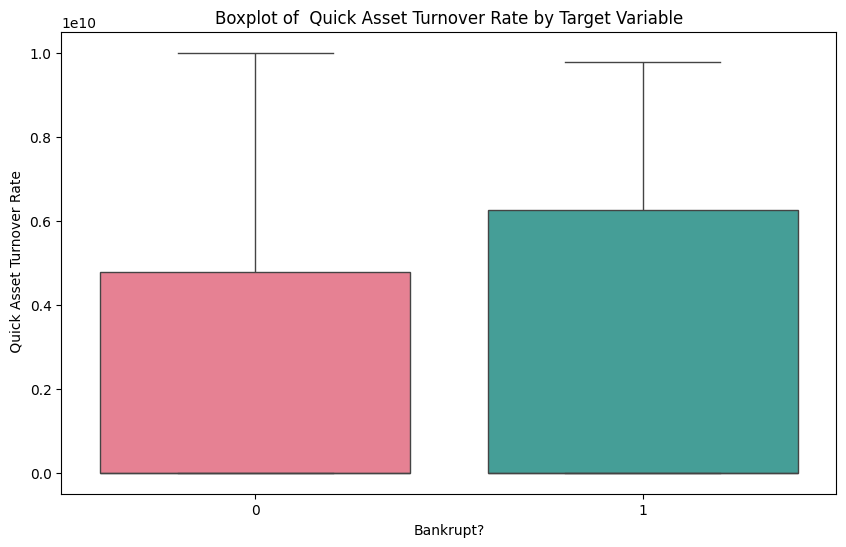

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


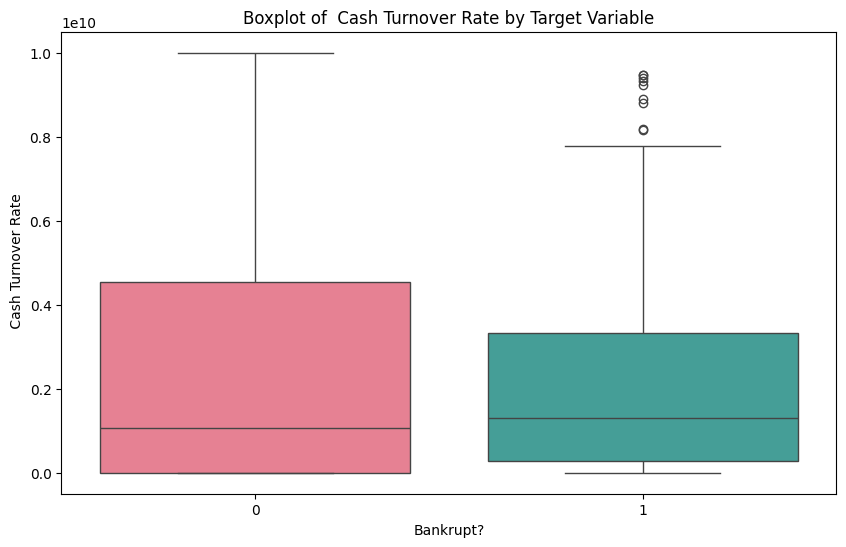

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


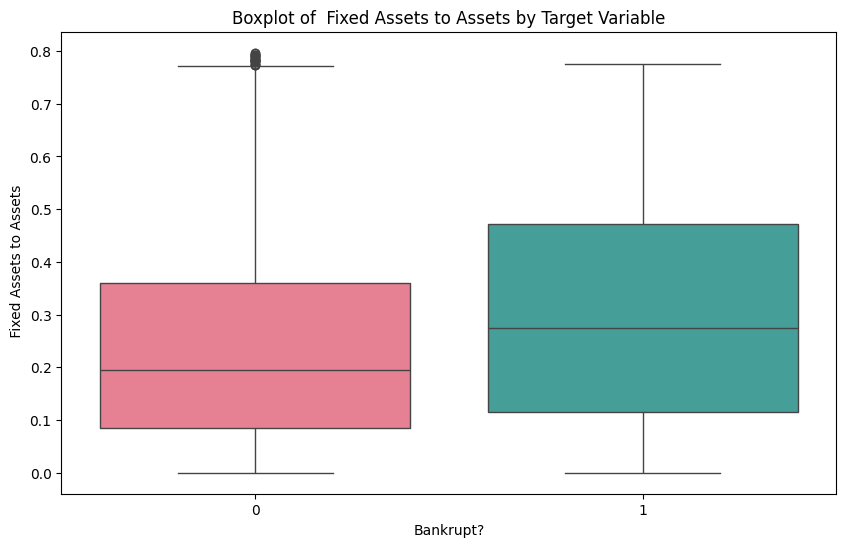

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


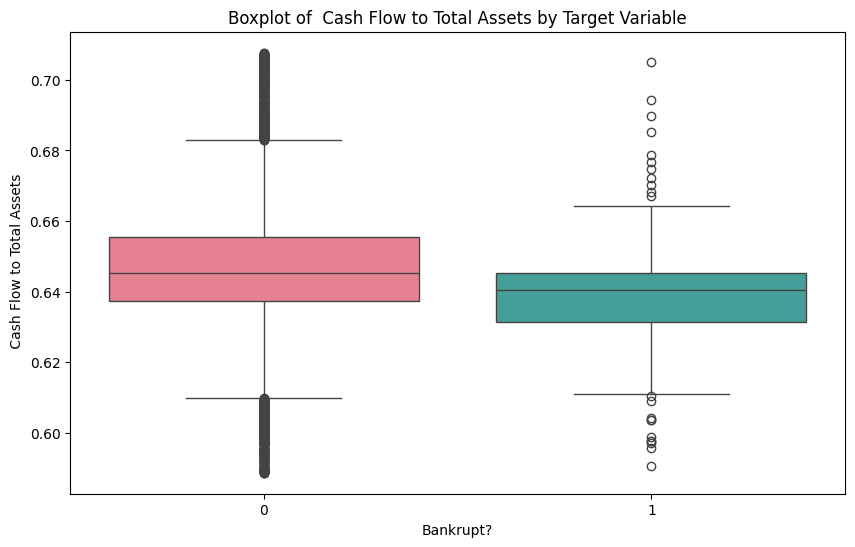

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


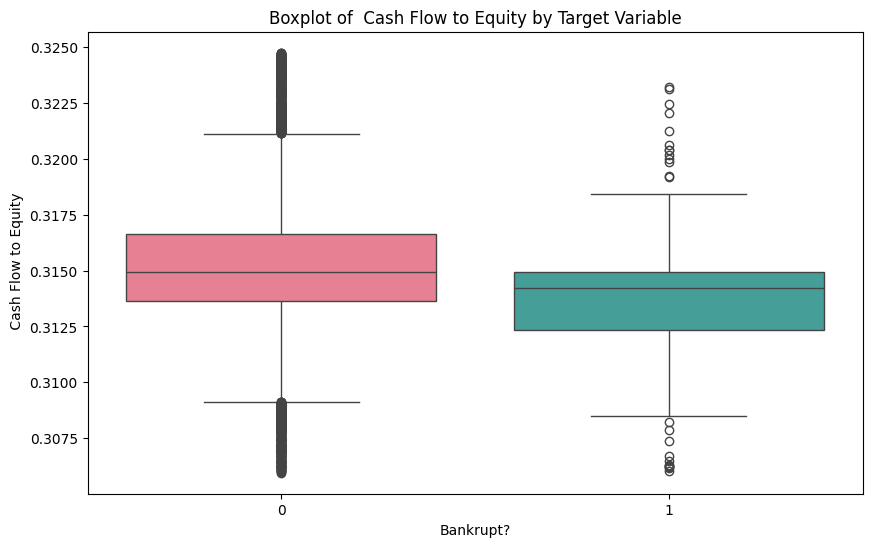

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


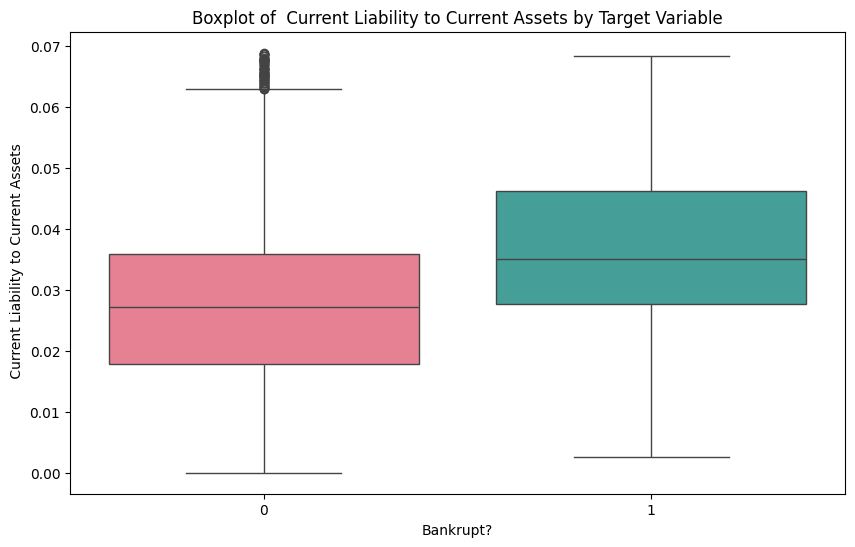

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


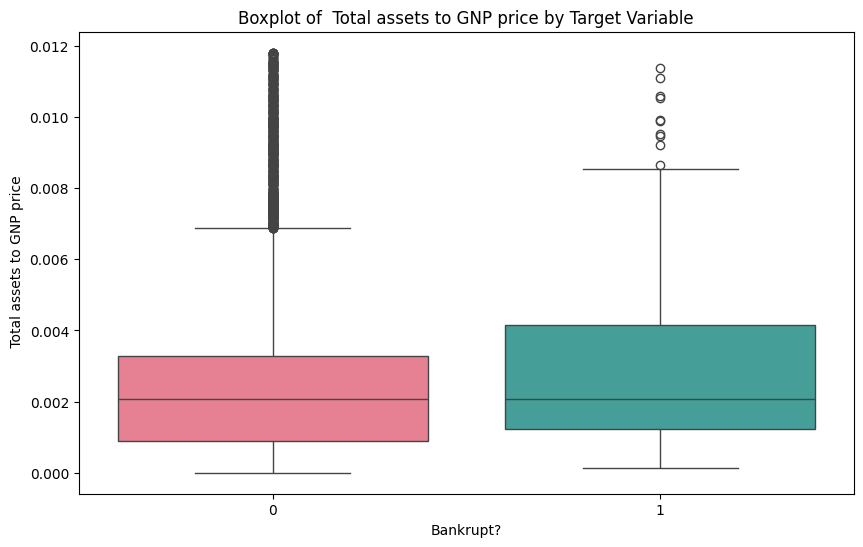

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


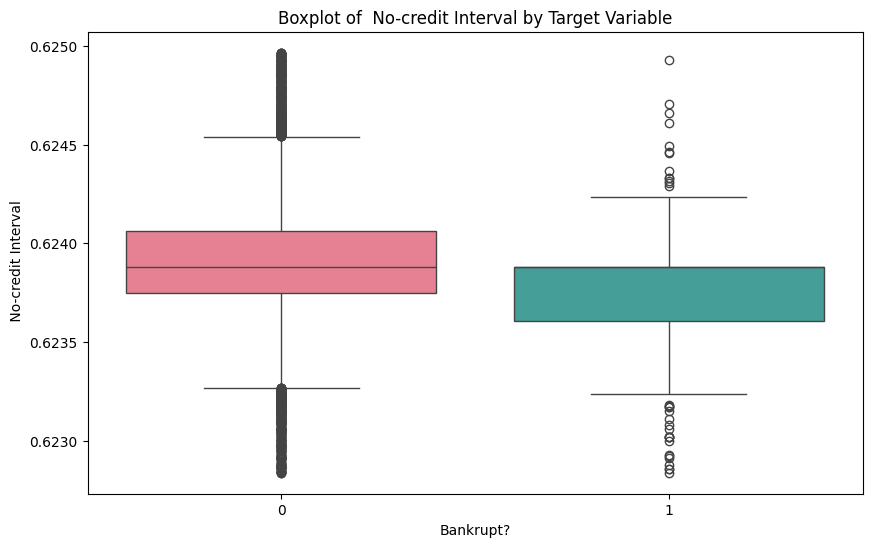

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


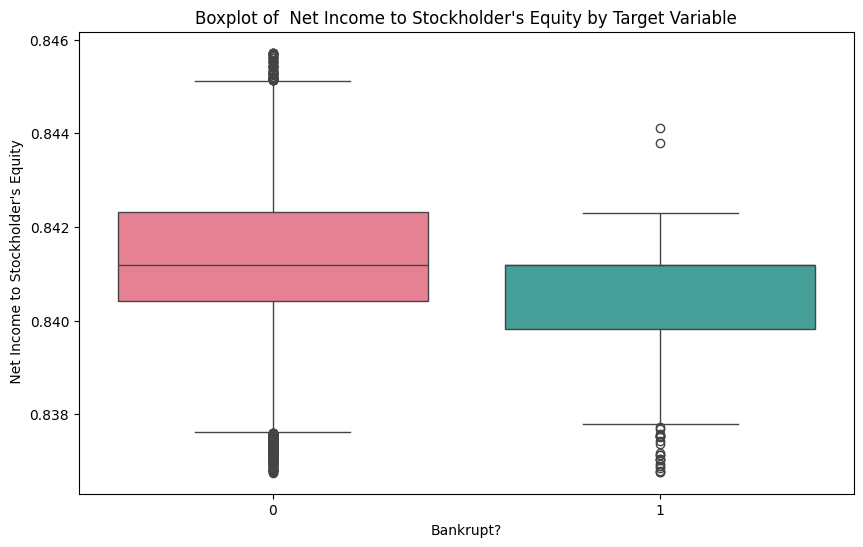

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


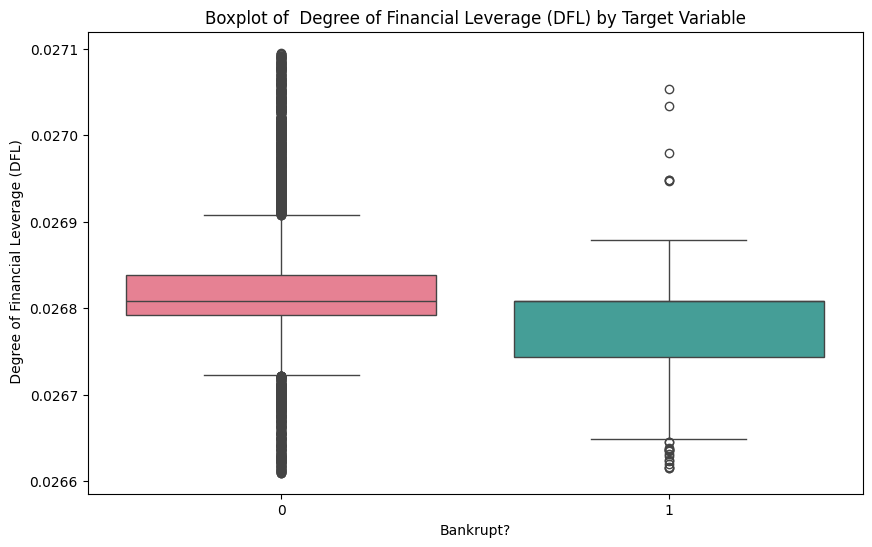

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


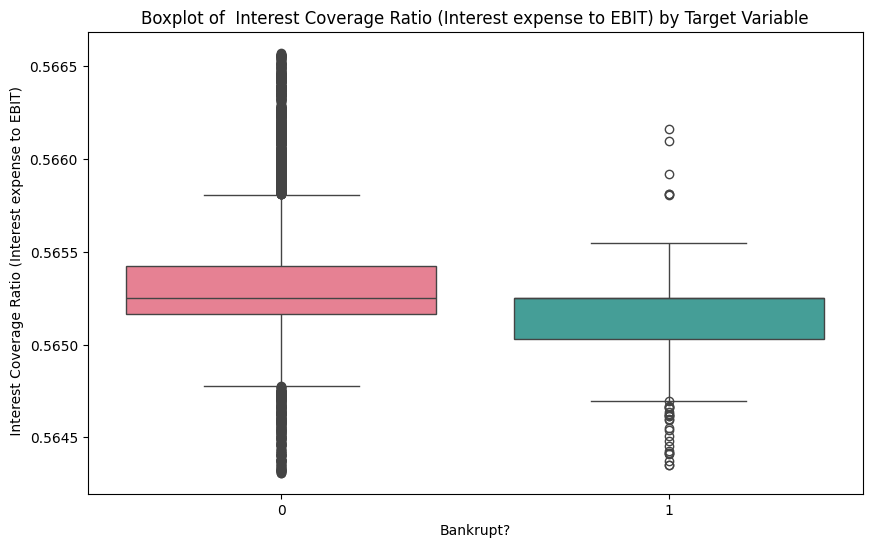

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30948\3468670656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


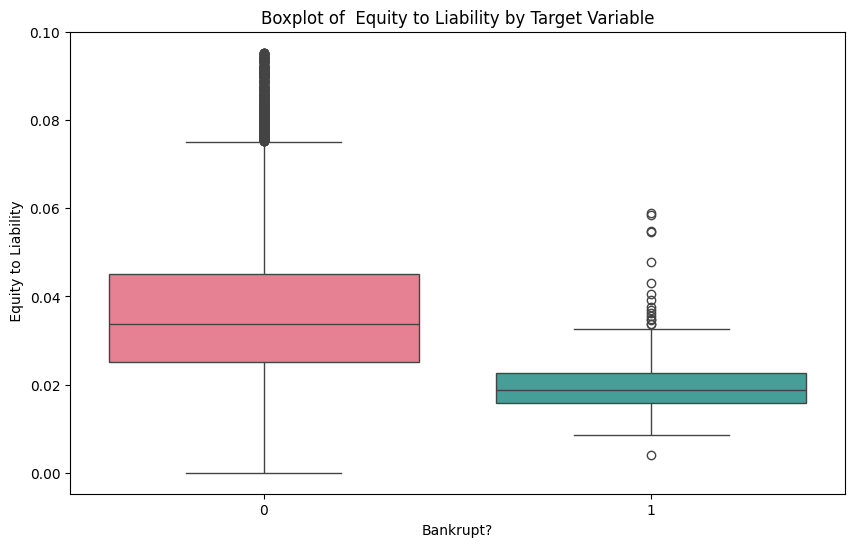

In [38]:
def plot_boxplots(dataframe, target_column, features):
    palette = sns.color_palette('husl', len(dataframe[target_column].unique()))

    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)
        plt.title(f'Boxplot of {feature} by Target Variable')
        plt.show()

plot_boxplots(df, 'Bankrupt?', numerical_features_reduced)


In [39]:
# ANOVA test
anova_results = {}
for feature in numerical_features_reduced:
    f_stat, p_value = f_oneway(df[df['Bankrupt?'] == 0][feature], df[df['Bankrupt?'] == 1][feature])
    anova_results[feature] = p_value

anova_df = pd.DataFrame(list(anova_results.items()), columns=['Feature', 'P-Value'])
print(anova_df)


                                              Feature       P-Value
0    ROA(C) before interest and depreciation befor...  1.211401e-45
1                              Operating Gross Margin  7.150363e-29
2                               Operating Profit Rate  8.012830e-30
3         Non-industry income and expenditure/revenue  1.487066e-22
4                              Operating Expense Rate  6.154927e-01
..                                                ...           ...
57                                 No-credit Interval  2.040882e-12
58                 Net Income to Stockholder's Equity  1.742063e-18
59                 Degree of Financial Leverage (DFL)  2.928395e-22
60   Interest Coverage Ratio (Interest expense to ...  1.009028e-18
61                                Equity to Liability  1.418096e-45

[62 rows x 2 columns]


In [40]:
# Chi-Square test
chi_square_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Bankrupt?'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi_square_results[feature] = p_value

chi_square_df = pd.DataFrame(list(chi_square_results.items()), columns=['Feature', 'P-Value'])
print(chi_square_df)


                  Feature       P-Value
0   Liability-Assets Flag  9.139777e-26
1         Net Income Flag  1.000000e+00


In [41]:
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

X.dropna(inplace=True)
y = y[X.index]  

# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# pca
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)

# (a) over & under 
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")

X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

# split
X_train, X_test, y_train, y_test = train_test_split(X_combined_sampling, y_combined_sampling, test_size=0.2, random_state=42)

def evaluate_models(X_train, y_train):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'Gaussian Naive Bayes': GaussianNB()
    }
    
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[model_name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred)
        }
    
    return results

results_over_under = evaluate_models(X_train, y_train)


Oversampled: Counter({0: 6599, 1: 3299})
Combined Random Sampling: Counter({0: 4123, 1: 3299})


In [45]:
all_results = {
    'Over & Under Sampling': results_over_under,
}
# Display results
for sampling_method, results in all_results.items():
    print(f"Results for {sampling_method}:\n", results)

Results for Over & Under Sampling:
 {'Logistic Regression': {'Accuracy': 0.5872053872053872, 'Precision': 0.5571428571428572, 'Recall': 0.1836734693877551, 'F1 Score': 0.2762691853600944}, 'Random Forest': {'Accuracy': 0.98989898989899, 'Precision': 0.9769938650306749, 'Recall': 1.0, 'F1 Score': 0.9883630721489527}, 'Gaussian Naive Bayes': {'Accuracy': 0.6875420875420876, 'Precision': 0.6790890269151139, 'Recall': 0.5149136577708007, 'F1 Score': 0.5857142857142857}}


In [ ]:
# (b) over & under using SMOTE, ADASYN, Tomek, CNN
'''
- Add one more EDA
- Outlier fix
- Try diff params

Optional : SMOTE, ADAYSN etc

Report:
- Literature Review
- Inferences/ Analysis
'''